# Part 1 - Setup and Data Preparation
In this section, we will:
- Import the necessary packages.
- Load the data.
- Data types of variables are changed as per their type, categorical variables are converted to object data type through appropriate mappings and type conversions.
- Encoding of quality variables to numerical ratings.
- New features created from existing features for improving the analysis.

In [188]:
#for not displaying warnings importing warnings library
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

#for linear regression modelling and analysis
import sklearn
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import ProbPlot

#for Ridge regression and Lasso regression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [189]:
house_pricing=pd.read_csv('train.csv')

In [190]:
house_pricing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Part 2 - Exploratory Data Analysis

In this section, we will:
- Remove columns not important for analysis
- Change the data types of variables as per their type, categorical variables are converted to object data type through appropriate mappings and type conversions.
- Perform outlier analysis
- Filling of blank data in columns
- Encoding of quality variables to numerical ratings.
- New features created from existing features for improving the analysis.
- Perform visualizations to get deeper insights into the data.

### Dropping the below columns:

   1. ID as it is not useful for the modelling activity.
   2. BsmtFinSF1, BsmtFinSF2 & BsmtUnfSF as thier sum is already included in TotalBsmtSF.
   3. Dropping 1stFlrSF and 2ndFlrSF as their sum is already included in GrLivArea.
   4. GarageYrBlt as there is another important feature YearBuilt for the house.
   5. HouseStyle as the data in HouseStyle column is already conveyed in MSSubclass column.

In [191]:
house_pricing.drop(columns=['Id','GarageYrBlt','1stFlrSF','2ndFlrSF','HouseStyle'],inplace=True)

### Changing the data type of the below columns: 

 1. MSSubClass from int64 to object as it is the type of dwelling.
 2. MoSold by mapping the numbers associated with the months to the month names.

In [192]:
house_pricing['MSSubClass']=house_pricing['MSSubClass'].astype('object')

In [193]:
house_pricing['MoSold']=house_pricing['MoSold'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

### Outlier Analysis

In [194]:
house_pricing.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
count,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,2007.815753,180921.195890
std,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,1.328095,79442.502883
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
25%,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,129975.000000
50%,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,163000.000000
75%,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,214000.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,2010.000000,755000.000000


From the above table following columns appear to have outliers:

 1. SalePrice
 2. LotArea

<Axes: ylabel='SalePrice'>

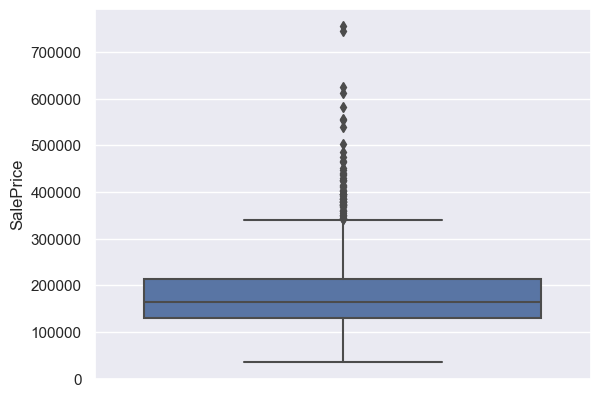

In [195]:
sns.set(font_scale=1.0)
sns.boxplot(y='SalePrice',data=house_pricing)

In [196]:
quantile_info = house_pricing['SalePrice'].quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50    163000.00
0.75    214000.00
0.90    278000.00
0.95    326100.00
0.97    374230.00
0.98    394931.06
0.99    442567.01
Name: SalePrice, dtype: float64

In [197]:
house_pricing=house_pricing[house_pricing['SalePrice']<=house_pricing['SalePrice'].quantile(0.99)]

<Axes: ylabel='SalePrice'>

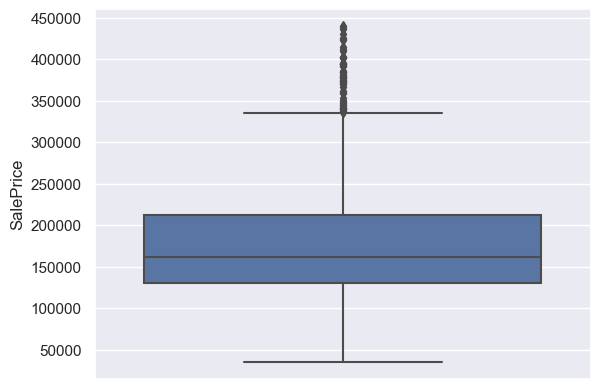

In [198]:
sns.boxplot(y='SalePrice',data=house_pricing)

<Axes: ylabel='LotArea'>

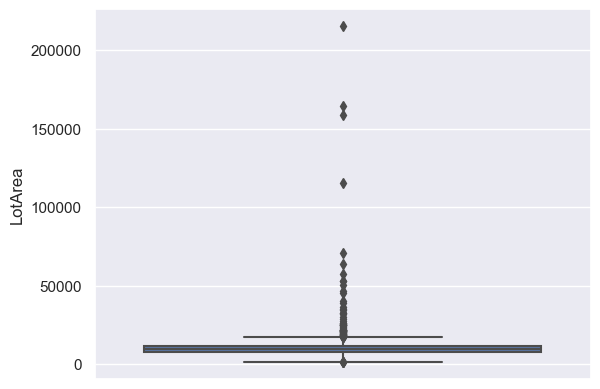

In [199]:
sns.boxplot(y='LotArea',data=house_pricing)

In [200]:
quantile_info = house_pricing['LotArea'].quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     9430.00
0.75    11478.00
0.90    14209.00
0.95    17091.80
0.97    21194.48
0.98    25011.40
0.99    35898.52
Name: LotArea, dtype: float64

In [201]:
house_pricing=house_pricing[house_pricing['LotArea']<=house_pricing['LotArea'].quantile(0.99)]

In [202]:
house_pricing.shape

(1430, 76)

In [203]:
house_pricing.shape

(1430, 76)

<Axes: ylabel='LotArea'>

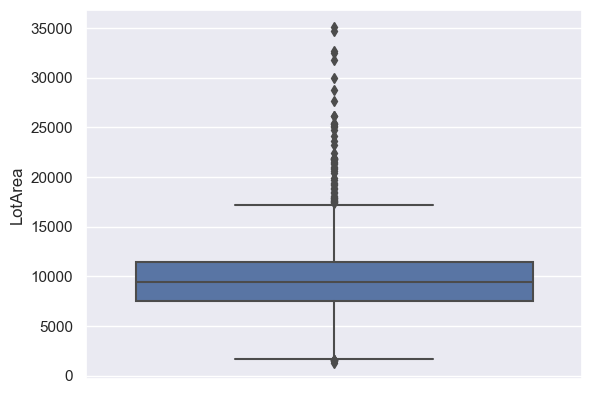

In [204]:
sns.boxplot(y='LotArea',data=house_pricing)

### Checking columns having null values.

In [205]:
house_pricing.isnull().sum()[house_pricing.columns[house_pricing.isnull().sum()>0]]

LotFrontage      251
Alley           1339
MasVnrType         7
MasVnrArea         7
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      689
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1425
Fence           1151
MiscFeature     1378
dtype: int64

Checking the data for basement related variables.

In [206]:
#getting the number of houses having no basement
len(house_pricing['BsmtFinSF2'][(house_pricing['BsmtFinSF1']==0)&(house_pricing['BsmtFinSF2']==0)&(house_pricing['BsmtUnfSF']==0)])

37

37 data points have BsmtFinSF2 and BsmtFinSF1 have 0 area, meaning that these houses don't have basement. 

In [207]:
house_pricing['BsmtQual'][(house_pricing['BsmtFinSF1']==0)&(house_pricing['BsmtFinSF2']==0)&(house_pricing['BsmtUnfSF']==0)]

17      NaN
39      NaN
90      NaN
102     NaN
156     NaN
182     NaN
259     NaN
342     NaN
362     NaN
371     NaN
392     NaN
520     NaN
532     NaN
533     NaN
553     NaN
646     NaN
705     NaN
736     NaN
749     NaN
778     NaN
868     NaN
894     NaN
897     NaN
984     NaN
1000    NaN
1011    NaN
1035    NaN
1045    NaN
1048    NaN
1049    NaN
1090    NaN
1179    NaN
1216    NaN
1218    NaN
1232    NaN
1321    NaN
1412    NaN
Name: BsmtQual, dtype: object

In [208]:
house_pricing['BsmtCond'][(house_pricing['BsmtFinSF1']==0)&(house_pricing['BsmtFinSF2']==0)&(house_pricing['BsmtUnfSF']==0)]

17      NaN
39      NaN
90      NaN
102     NaN
156     NaN
182     NaN
259     NaN
342     NaN
362     NaN
371     NaN
392     NaN
520     NaN
532     NaN
533     NaN
553     NaN
646     NaN
705     NaN
736     NaN
749     NaN
778     NaN
868     NaN
894     NaN
897     NaN
984     NaN
1000    NaN
1011    NaN
1035    NaN
1045    NaN
1048    NaN
1049    NaN
1090    NaN
1179    NaN
1216    NaN
1218    NaN
1232    NaN
1321    NaN
1412    NaN
Name: BsmtCond, dtype: object

In [209]:
house_pricing['BsmtExposure'][(house_pricing['BsmtFinSF1']==0)&(house_pricing['BsmtFinSF2']==0)&(house_pricing['BsmtUnfSF']==0)]

17      NaN
39      NaN
90      NaN
102     NaN
156     NaN
182     NaN
259     NaN
342     NaN
362     NaN
371     NaN
392     NaN
520     NaN
532     NaN
533     NaN
553     NaN
646     NaN
705     NaN
736     NaN
749     NaN
778     NaN
868     NaN
894     NaN
897     NaN
984     NaN
1000    NaN
1011    NaN
1035    NaN
1045    NaN
1048    NaN
1049    NaN
1090    NaN
1179    NaN
1216    NaN
1218    NaN
1232    NaN
1321    NaN
1412    NaN
Name: BsmtExposure, dtype: object

In [210]:
house_pricing['BsmtFinType1'][(house_pricing['BsmtFinSF1']==0)&(house_pricing['BsmtFinSF2']==0)&(house_pricing['BsmtUnfSF']==0)]

17      NaN
39      NaN
90      NaN
102     NaN
156     NaN
182     NaN
259     NaN
342     NaN
362     NaN
371     NaN
392     NaN
520     NaN
532     NaN
533     NaN
553     NaN
646     NaN
705     NaN
736     NaN
749     NaN
778     NaN
868     NaN
894     NaN
897     NaN
984     NaN
1000    NaN
1011    NaN
1035    NaN
1045    NaN
1048    NaN
1049    NaN
1090    NaN
1179    NaN
1216    NaN
1218    NaN
1232    NaN
1321    NaN
1412    NaN
Name: BsmtFinType1, dtype: object

In [211]:
house_pricing['BsmtFinType2'][(house_pricing['BsmtFinSF1']==0)&(house_pricing['BsmtFinSF2']==0)&(house_pricing['BsmtUnfSF']==0)]

17      NaN
39      NaN
90      NaN
102     NaN
156     NaN
182     NaN
259     NaN
342     NaN
362     NaN
371     NaN
392     NaN
520     NaN
532     NaN
533     NaN
553     NaN
646     NaN
705     NaN
736     NaN
749     NaN
778     NaN
868     NaN
894     NaN
897     NaN
984     NaN
1000    NaN
1011    NaN
1035    NaN
1045    NaN
1048    NaN
1049    NaN
1090    NaN
1179    NaN
1216    NaN
1218    NaN
1232    NaN
1321    NaN
1412    NaN
Name: BsmtFinType2, dtype: object

For the columns BsmtQual, BsmtCond, BsmtFinType1, BsmtExposure and BsmtFinType2 the entries are blank when both the columns BsmtFinSF1 & BsmtFinSF2 are having 0 area.

In [212]:
#filling the empty data
house_pricing['BsmtQual'].fillna('No Basement',inplace=True)
house_pricing['BsmtCond'].fillna('No Basement',inplace=True)
house_pricing['BsmtFinType1'].fillna('No Basement',inplace=True)

In [213]:
house_pricing['BsmtFinType2'][house_pricing['BsmtFinType1']=='No Basement']=house_pricing['BsmtFinType2'][house_pricing['BsmtFinType1']=='No Basement'].fillna('No Basement')

In [214]:
house_pricing['BsmtFinType2'].isnull().sum()

1

In [215]:
house_pricing['BsmtExposure'][house_pricing['BsmtFinType1']=='No Basement']=house_pricing['BsmtExposure'][house_pricing['BsmtFinType1']=='No Basement'].fillna('No Basement')

In [216]:
house_pricing['BsmtExposure'].isnull().sum()

1

In [217]:
house_pricing['BsmtFinType2'].fillna(house_pricing['BsmtFinType2'].mode()[0],inplace=True)

In [218]:
house_pricing['BsmtExposure'].fillna(house_pricing['BsmtExposure'].mode()[0],inplace=True)

Checking the data for garage related variables.

In [219]:
len(house_pricing['GarageType'][(house_pricing['GarageArea']==0)])

81

In [220]:
len(house_pricing['GarageFinish'][(house_pricing['GarageArea']==0)])

81

In [221]:
len(house_pricing['GarageQual'][(house_pricing['GarageArea']==0)])

81

In [222]:
len(house_pricing['GarageCond'][(house_pricing['GarageArea']==0)])

81

As the above outputs show that all the columns GarageType, GarageFinish, GarageQual and GarageCond are blank when the GarageArea is 0.

In [223]:
#filling the empty data
house_pricing['GarageType'].fillna('No Garage',inplace=True)
house_pricing['GarageFinish'].fillna('No Garage',inplace=True)
house_pricing['GarageQual'].fillna('No Garage',inplace=True)
house_pricing['GarageCond'].fillna('No Garage',inplace=True)

Checking the data for pool related variables.

In [224]:
len(house_pricing['PoolQC'][(house_pricing['PoolArea']==0)])

1425

This means that 1425 houses don't have a pool and thus for the same PoolQc value can be updated as No Pool.

In [225]:
house_pricing['PoolQC'].fillna('No Pool',inplace=True)

Checking the data for miscellaneous feautures related variables.

In [226]:
len(house_pricing['MiscFeature'][(house_pricing['MiscVal']==0)])

1380

This means that 1380 houses don't have miscellaneous features and thus for the same MiscVal value can be updated as No Miscellaneous Features.

In [227]:
house_pricing['MiscFeature'].fillna('No Miscellaneous Features',inplace=True)

Checking the data for fireplace related variables.

In [228]:
len(house_pricing['FireplaceQu'][(house_pricing['Fireplaces']==0)])

689

This means that 689 houses don't have any fireplaces and thus for the same FireplaceQu value can be updated as No Fireplace.

In [229]:
house_pricing['FireplaceQu'].fillna('No Fireplace',inplace=True)

Similary filling the empty values for Fence, LotFrontage, Electrical, MasVnrType, MasVnrArea and Alley.

In [230]:
house_pricing['Fence'].fillna('No Fence',inplace=True)

In [231]:
house_pricing['LotFrontage'].fillna(house_pricing['LotFrontage'].median(),inplace=True)

In [232]:
house_pricing['MasVnrType'].fillna(house_pricing['MasVnrType'].mode()[0],inplace=True)

In [233]:
house_pricing['Electrical'].fillna(house_pricing['Electrical'].mode()[0],inplace=True)

In [234]:
house_pricing['MasVnrArea'].fillna(house_pricing['MasVnrArea'].median(),inplace=True)

In [235]:
house_pricing['Alley'].fillna('No Alley Access',inplace=True)

In [236]:
pd.set_option('display.max_rows', None) #to display all the rows
house_pricing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1430 non-null   object 
 1   MSZoning       1430 non-null   object 
 2   LotFrontage    1430 non-null   float64
 3   LotArea        1430 non-null   int64  
 4   Street         1430 non-null   object 
 5   Alley          1430 non-null   object 
 6   LotShape       1430 non-null   object 
 7   LandContour    1430 non-null   object 
 8   Utilities      1430 non-null   object 
 9   LotConfig      1430 non-null   object 
 10  LandSlope      1430 non-null   object 
 11  Neighborhood   1430 non-null   object 
 12  Condition1     1430 non-null   object 
 13  Condition2     1430 non-null   object 
 14  BldgType       1430 non-null   object 
 15  OverallQual    1430 non-null   int64  
 16  OverallCond    1430 non-null   int64  
 17  YearBuilt      1430 non-null   int64  
 18  YearRemo

Dropping BsmtFinSF1, BsmtFinSF2 and BsmtUnfSF as their total is already captured in TotalBsmtSF.

In [237]:
house_pricing.drop(columns=['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'],inplace=True)

### Creating new features from existing features for the below variables:

 1. AgeSelling : For getting the age of the house when it is sold, AgeSelling = YrSold - YearBuilt
 2. AgeRemodelling : For getting the age of the house when it is sold, AgeSelling = YrSold - YearBuilt
 3. TotFullBath : Adding the basement full bathrooms and above grade full bathrooms to get the total full bathrooms in a house, TotFullBath = BsmtFullBath +  FullBath
 4. TotHalfBath : Adding the basement half bathrooms and above grade half bathrooms to get the total half bathrooms in a house, TotHalfBath = BsmtHalfBath +  HalfBath
 5. ExteriorMat : Combining Exterior1st & Exterior2nd when they are same only Exterior1st value is considered when they are different both Exterior1st & Exterior2nd values are combined.
 6. Conditions : Combining Condition1 & Condition2 when they are same only Condition1 value is considered when they are different both Condition1 & Condition2 values are combined.

In [238]:
house_pricing['AgeSelling']=house_pricing['YrSold']-house_pricing['YearBuilt']
house_pricing['AgeRemodelling']=house_pricing['YearRemodAdd']-house_pricing['YearBuilt']
house_pricing['TotFullBath']=house_pricing['BsmtFullBath']+house_pricing['FullBath']
house_pricing['TotHalfBath']=house_pricing['BsmtHalfBath']+house_pricing['HalfBath']

In [239]:
house_pricing['ExteriorMat']=house_pricing['Exterior1st'][house_pricing['Exterior1st']!=house_pricing['Exterior2nd']]+" & "+house_pricing['Exterior2nd'][house_pricing['Exterior1st']!=house_pricing['Exterior2nd']]
house_pricing['ExteriorMat'].fillna(house_pricing['Exterior1st'],inplace=True)

In [240]:
house_pricing['Conditions']=house_pricing['Condition1'][house_pricing['Condition1']!=house_pricing['Condition2']]+" & "+house_pricing['Condition2'][house_pricing['Condition1']!=house_pricing['Condition2']]
house_pricing['Conditions'].fillna(house_pricing['Condition1'],inplace=True)

Dropping YearBuilt, YearRemodAdd, YrSold, BsmtFullBath, FullBath, BsmtHalfBath, HalfBath, Exterior1st, Exterior2nd, Condition1 and Condition2 columns.

In [241]:
house_pricing.drop(columns=['YearBuilt', 'YearRemodAdd', 'YrSold', 'BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'Exterior1st', 'Exterior2nd', 'Condition1', 'Condition2'],inplace=True)

In [242]:
num_vars=list(house_pricing.columns[house_pricing.dtypes!='object'])

In [243]:
num_vars

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'TotalBsmtSF',
 'LowQualFinSF',
 'GrLivArea',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice',
 'AgeSelling',
 'AgeRemodelling',
 'TotFullBath',
 'TotHalfBath']

### Creating encodings for all ratings columns

In [244]:
house_pricing.columns[house_pricing.dtypes=='object']

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'BldgType',
       'RoofStyle', 'RoofMatl', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition',
       'ExteriorMat', 'Conditions'],
      dtype='object')

In [245]:
house_pricing['LandSlope']=house_pricing['LandSlope'].map({'Gtl':1,'Mod':2,'Sev':3})

In [246]:
house_pricing['ExterQual']=house_pricing['ExterQual'].map({'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5})

In [247]:
house_pricing['ExterCond']=house_pricing['ExterCond'].map({'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5})

In [248]:
house_pricing['BsmtQual']=house_pricing['BsmtQual'].map({'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5,'No Basement':6})

In [249]:
house_pricing['BsmtCond']=house_pricing['BsmtCond'].map({'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5,'No Basement':6})

In [250]:
house_pricing['BsmtExposure']=house_pricing['BsmtExposure'].map({'Gd':1,'Av':2,'Mn':3,'No':4,'No Basement':5})

In [251]:
house_pricing['HeatingQC']=house_pricing['HeatingQC'].map({'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5})

In [252]:
house_pricing['KitchenQual']=house_pricing['KitchenQual'].map({'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5})

In [253]:
house_pricing['FireplaceQu']=house_pricing['FireplaceQu'].map({'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5,'No Fireplace':6})

In [254]:
house_pricing['GarageFinish']=house_pricing['GarageFinish'].map({'Fin':1,'RFn':2,'Unf':3,'No Garage':6})

In [255]:
house_pricing['Fence'].unique()

array(['No Fence', 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [256]:
house_pricing['GarageQual']=house_pricing['GarageQual'].map({'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5,'No Garage':6})

In [257]:
house_pricing['GarageCond']=house_pricing['GarageCond'].map({'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5,'No Garage':6})

In [258]:
house_pricing['PoolQC']=house_pricing['PoolQC'].map({'Ex':1,'Gd':2,'TA':3,'Fa':4,'No Pool':6})

In [259]:
house_pricing['Fence']=house_pricing['Fence'].map({'GdPrv':1,'MnPrv':2,'GdWo':3,'MnWw':4,'No Fence':5})

In [260]:
house_pricing['BsmtFinType1']=house_pricing['BsmtFinType1'].map({'GLQ':1,'ALQ':2,'BLQ':3,'Rec':4,'LwQ':5,'Unf':6,'NA':7})

In [261]:
house_pricing['BsmtFinType2']=house_pricing['BsmtFinType2'].map({'GLQ':1,'ALQ':2,'BLQ':3,'Rec':4,'LwQ':5,'Unf':6,'NA':7})

### Understanding the impact of the categorical variables on the sale price

In [262]:
house_pricing.columns[house_pricing.dtypes=='object']

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'Neighborhood', 'BldgType', 'RoofStyle',
       'RoofMatl', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir',
       'Electrical', 'Functional', 'GarageType', 'PavedDrive', 'MiscFeature',
       'MoSold', 'SaleType', 'SaleCondition', 'ExteriorMat', 'Conditions'],
      dtype='object')

In [263]:
columns_sale_price_1=['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig','BldgType', 'RoofStyle','MasVnrType','MoSold'] 
columns_sale_price_2=['ExterQual', 'Neighborhood']
columns_sale_price_3=['BsmtExposure', 'GarageType', 'SaleCondition', 'BsmtQual']
columns_sale_price_4=['Foundation','ExteriorMat']

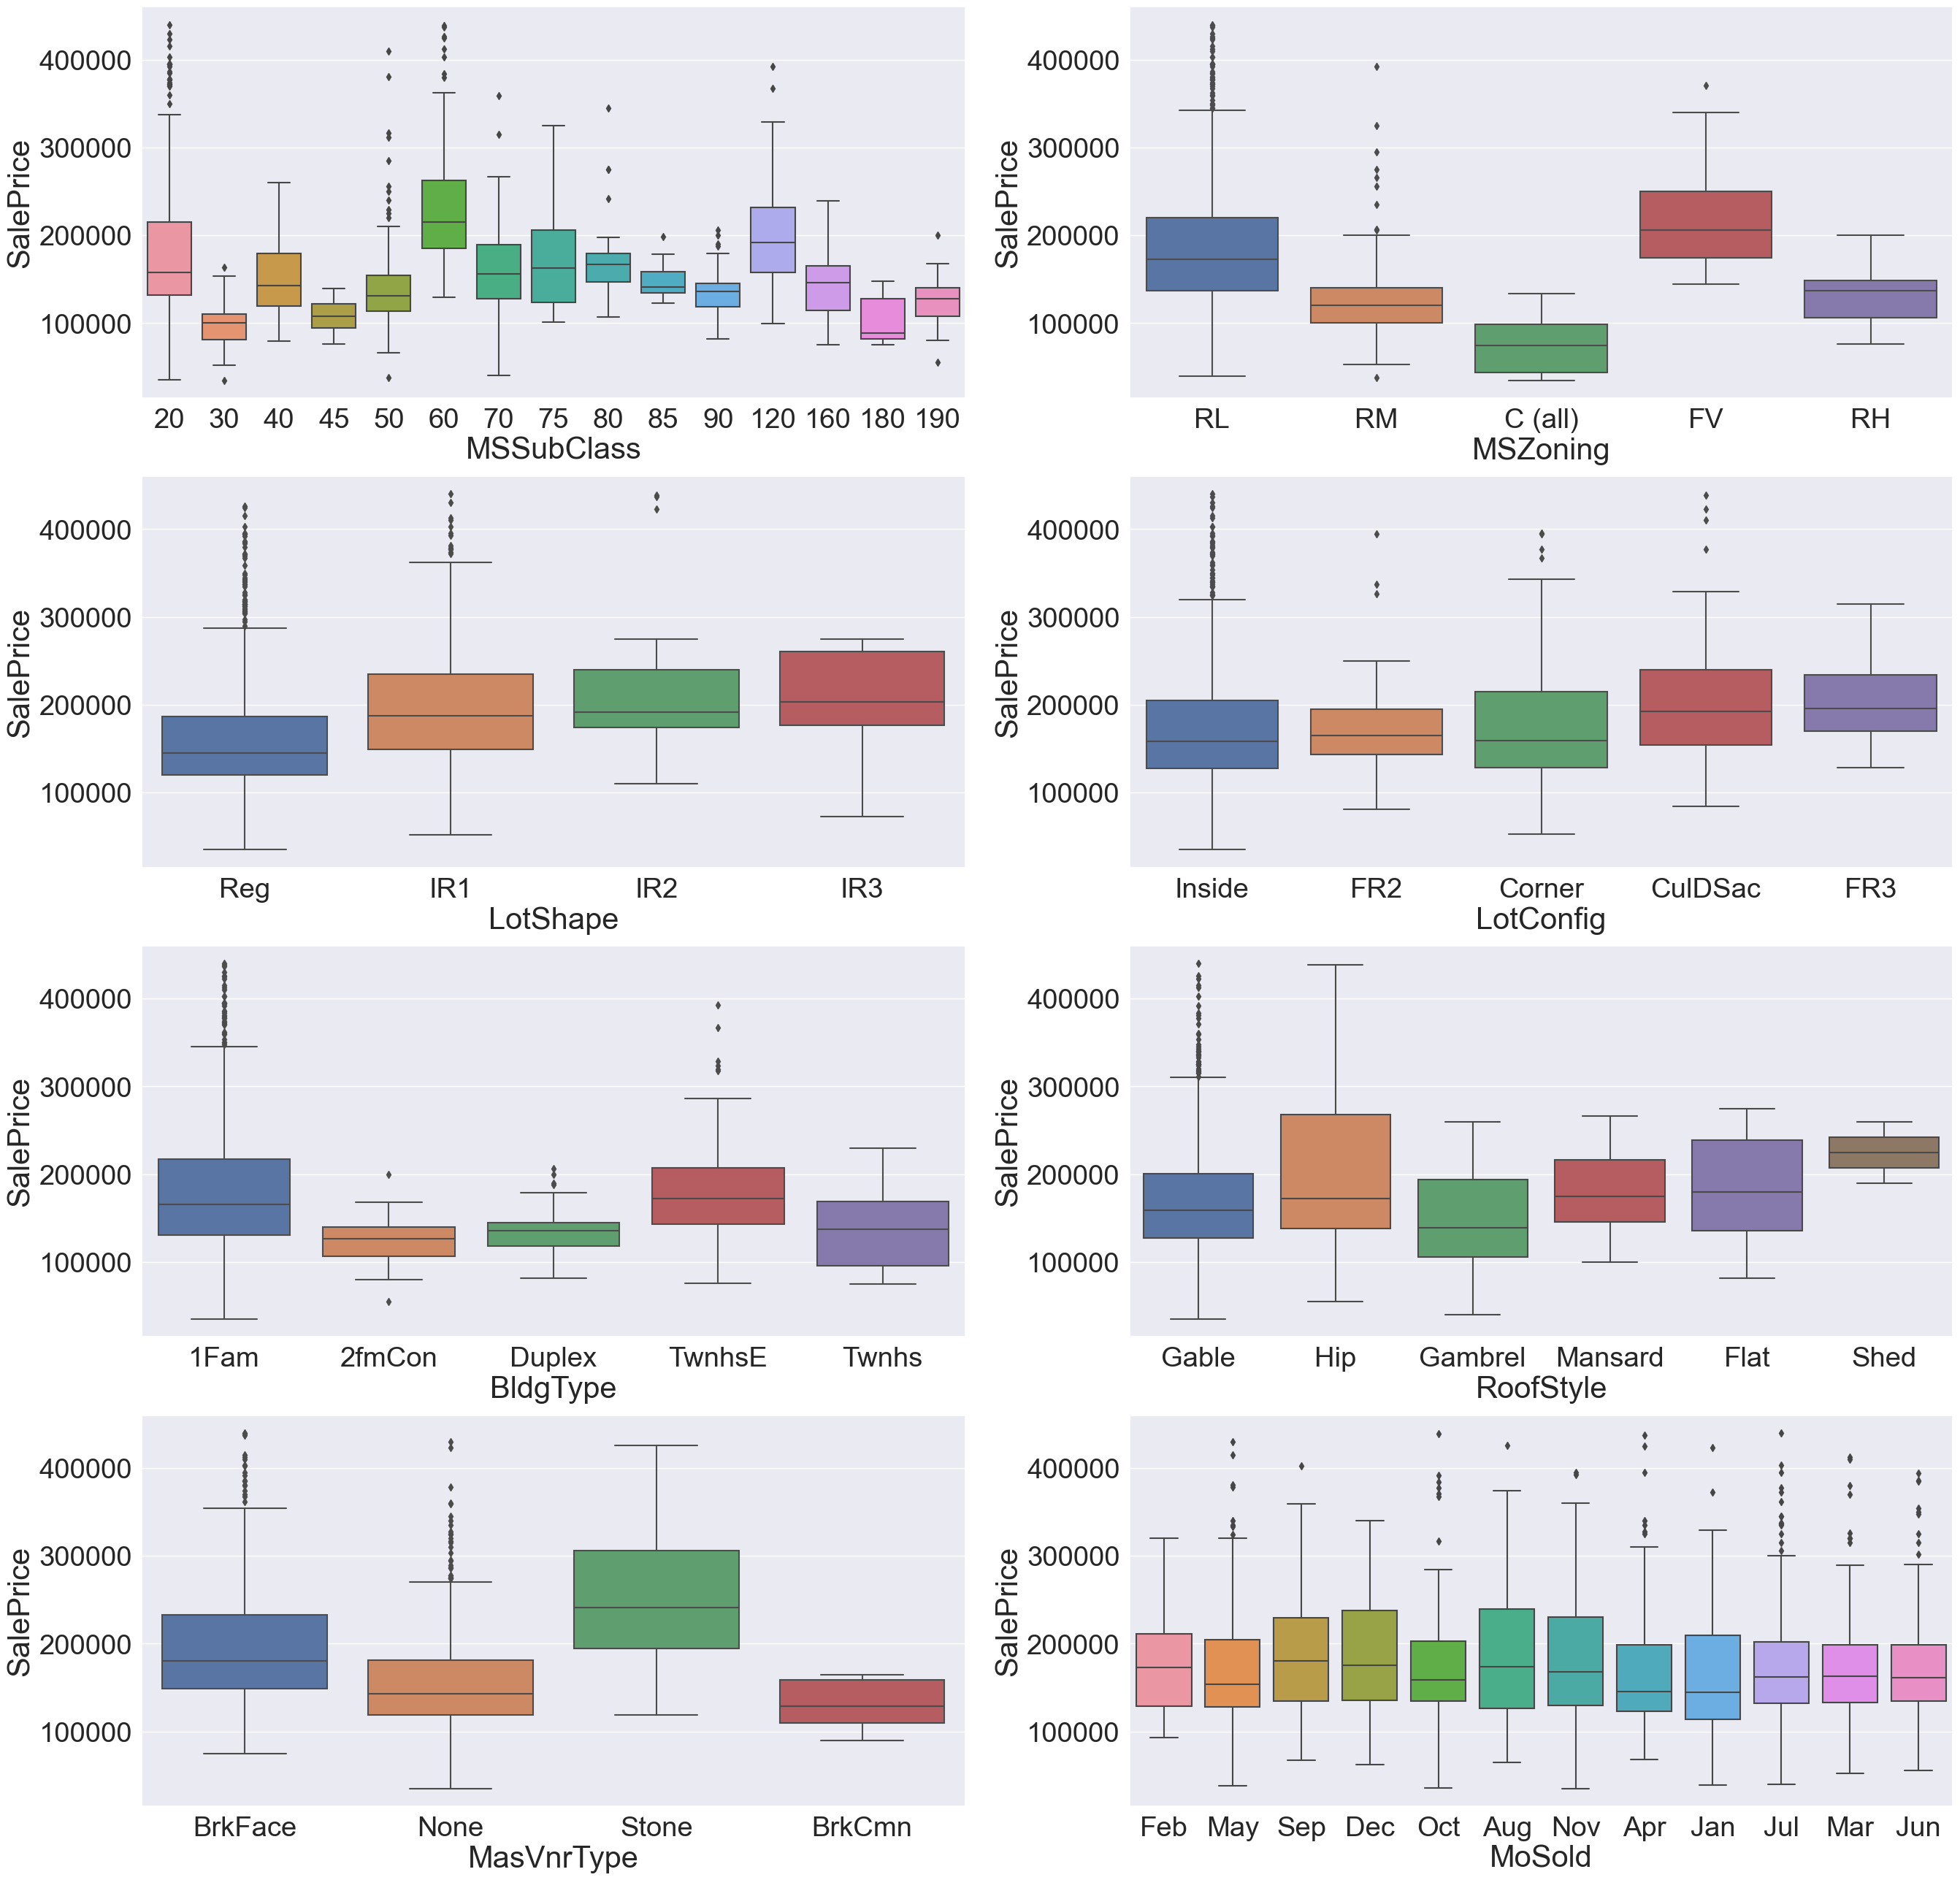

In [264]:
plt.figure(figsize=(32,32))
for i in range(len(columns_sale_price_1)):
    sns.set(font_scale=2.5)
    plt.subplot(4,2,i+1)
    sns.boxplot(x=house_pricing[columns_sale_price_1[i]],y='SalePrice',data=house_pricing)

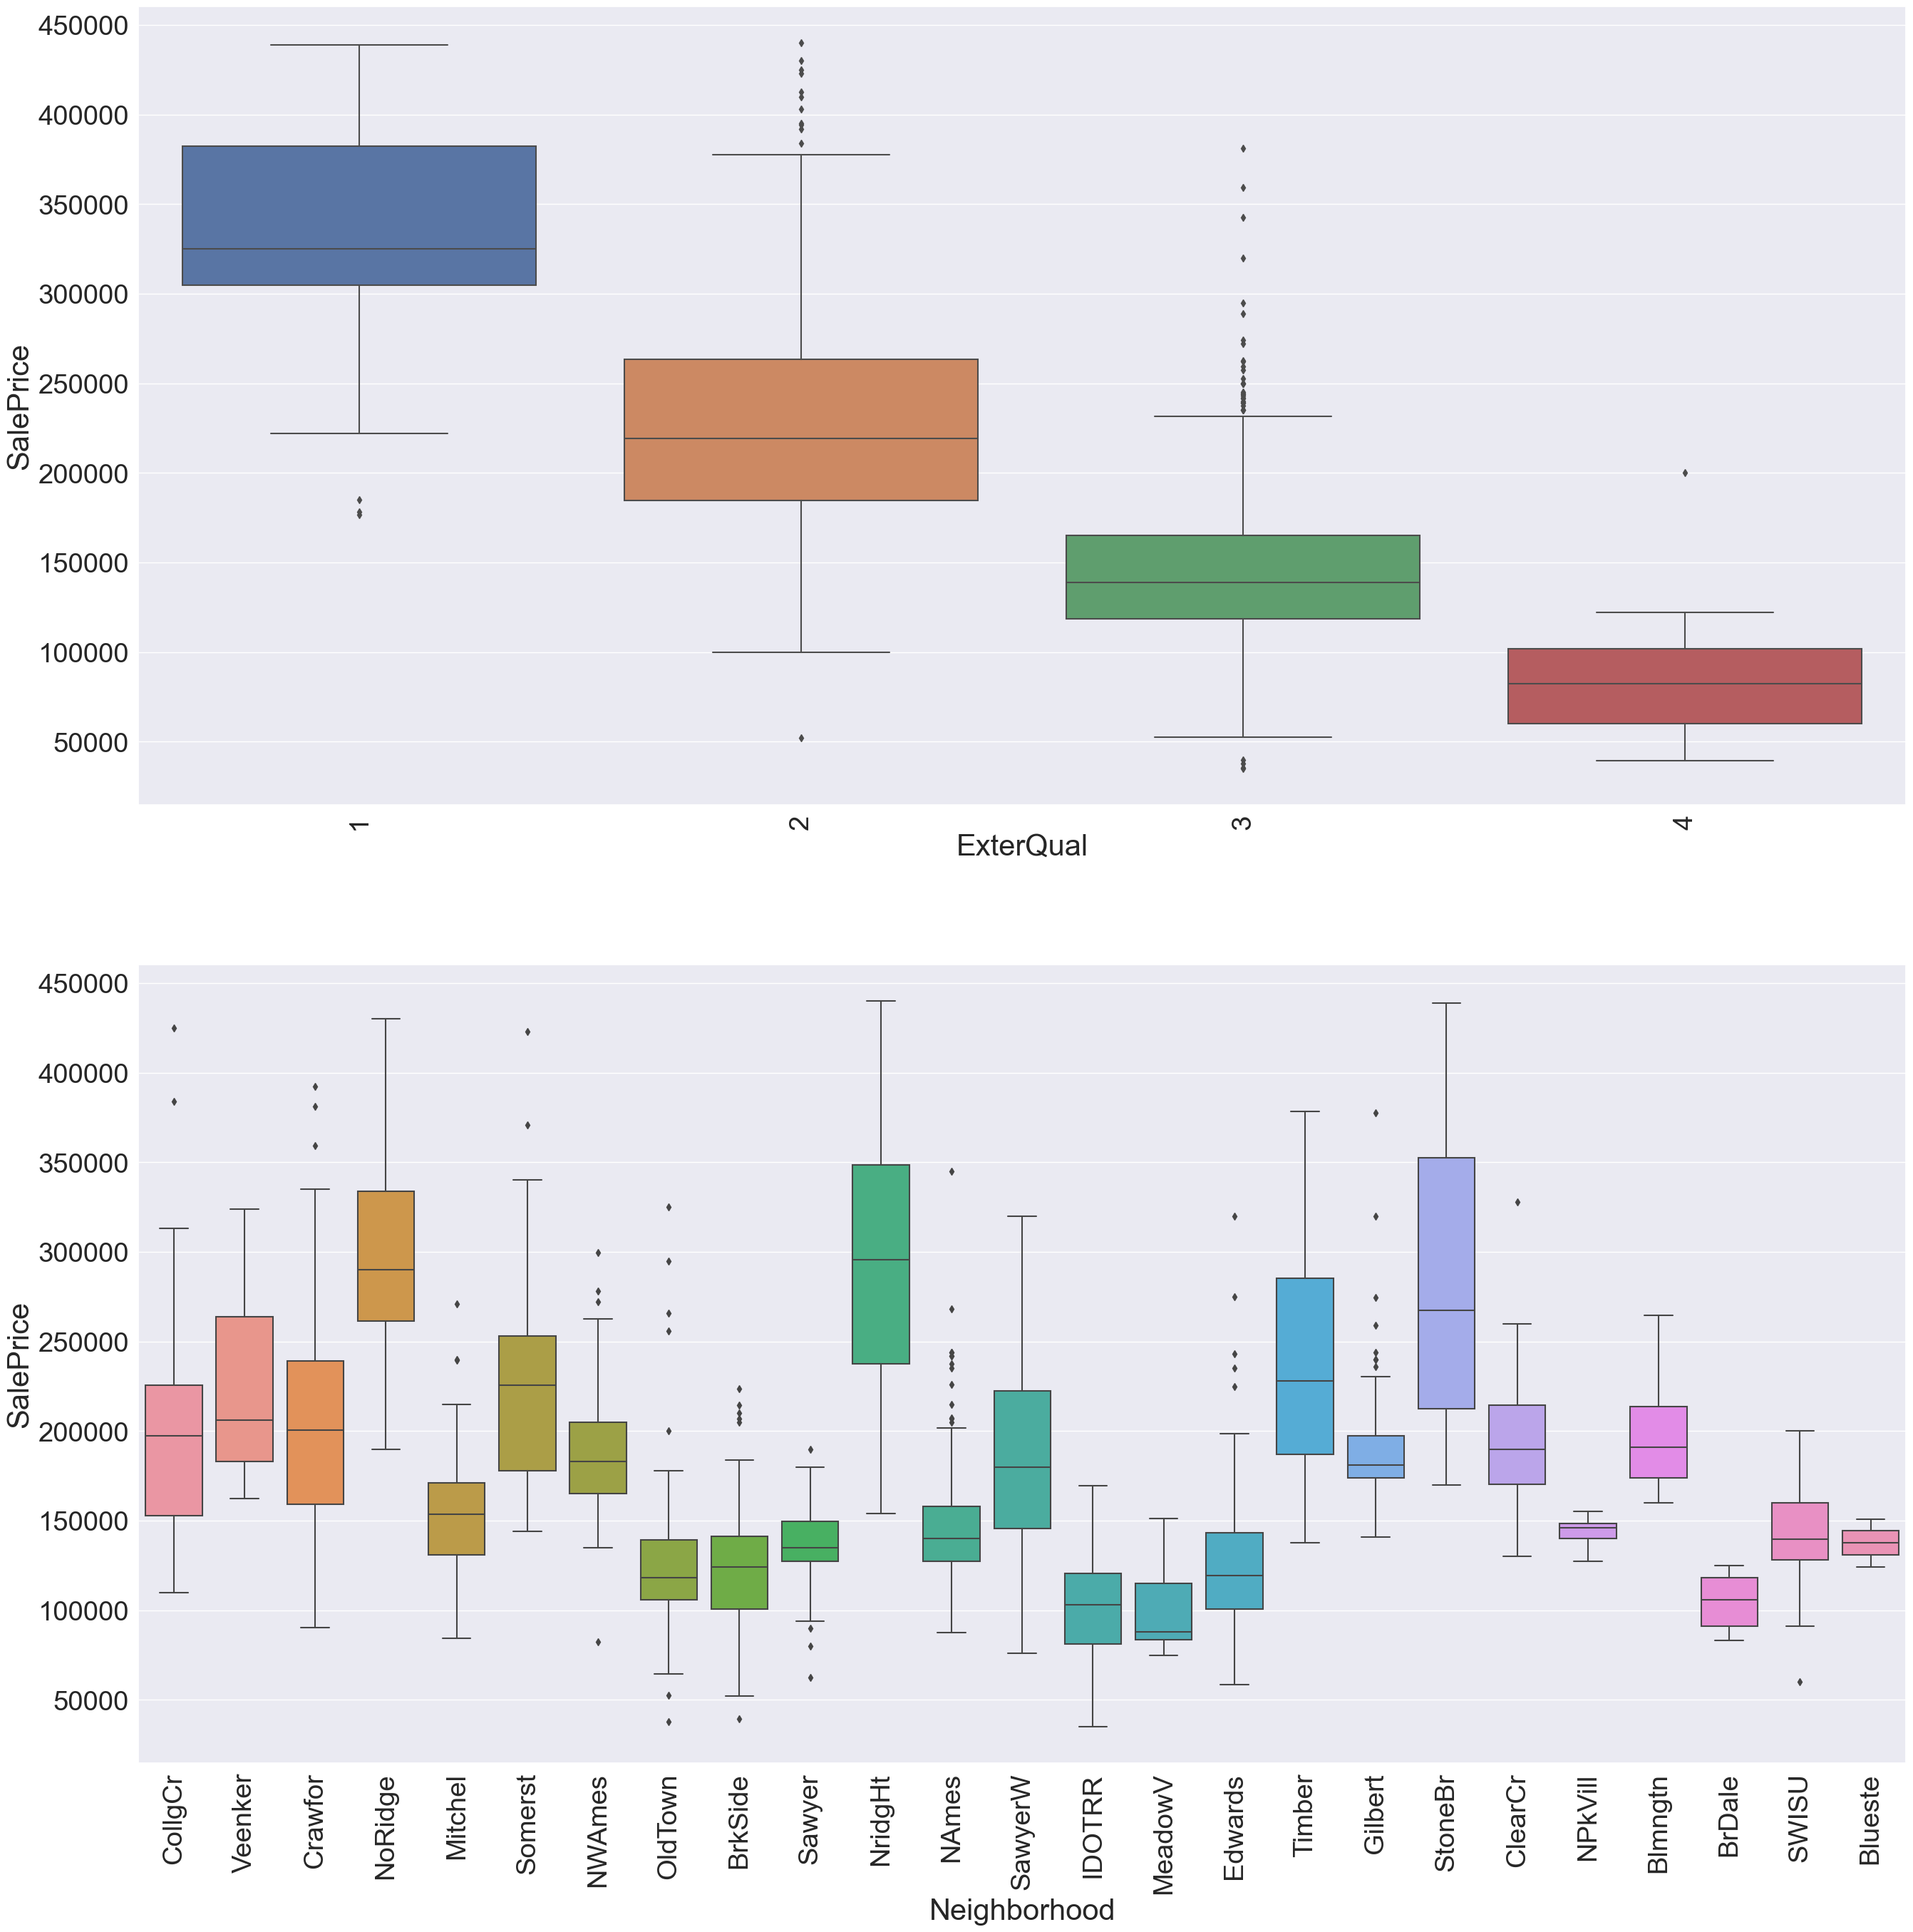

In [265]:
plt.figure(figsize=(32,32))
for i in range(len(columns_sale_price_2)):
    sns.set(font_scale=2.5)
    plt.subplot(2,1,i+1)
    plt.xticks(rotation=90)
    sns.boxplot(x=house_pricing[columns_sale_price_2[i]],y='SalePrice',data=house_pricing)

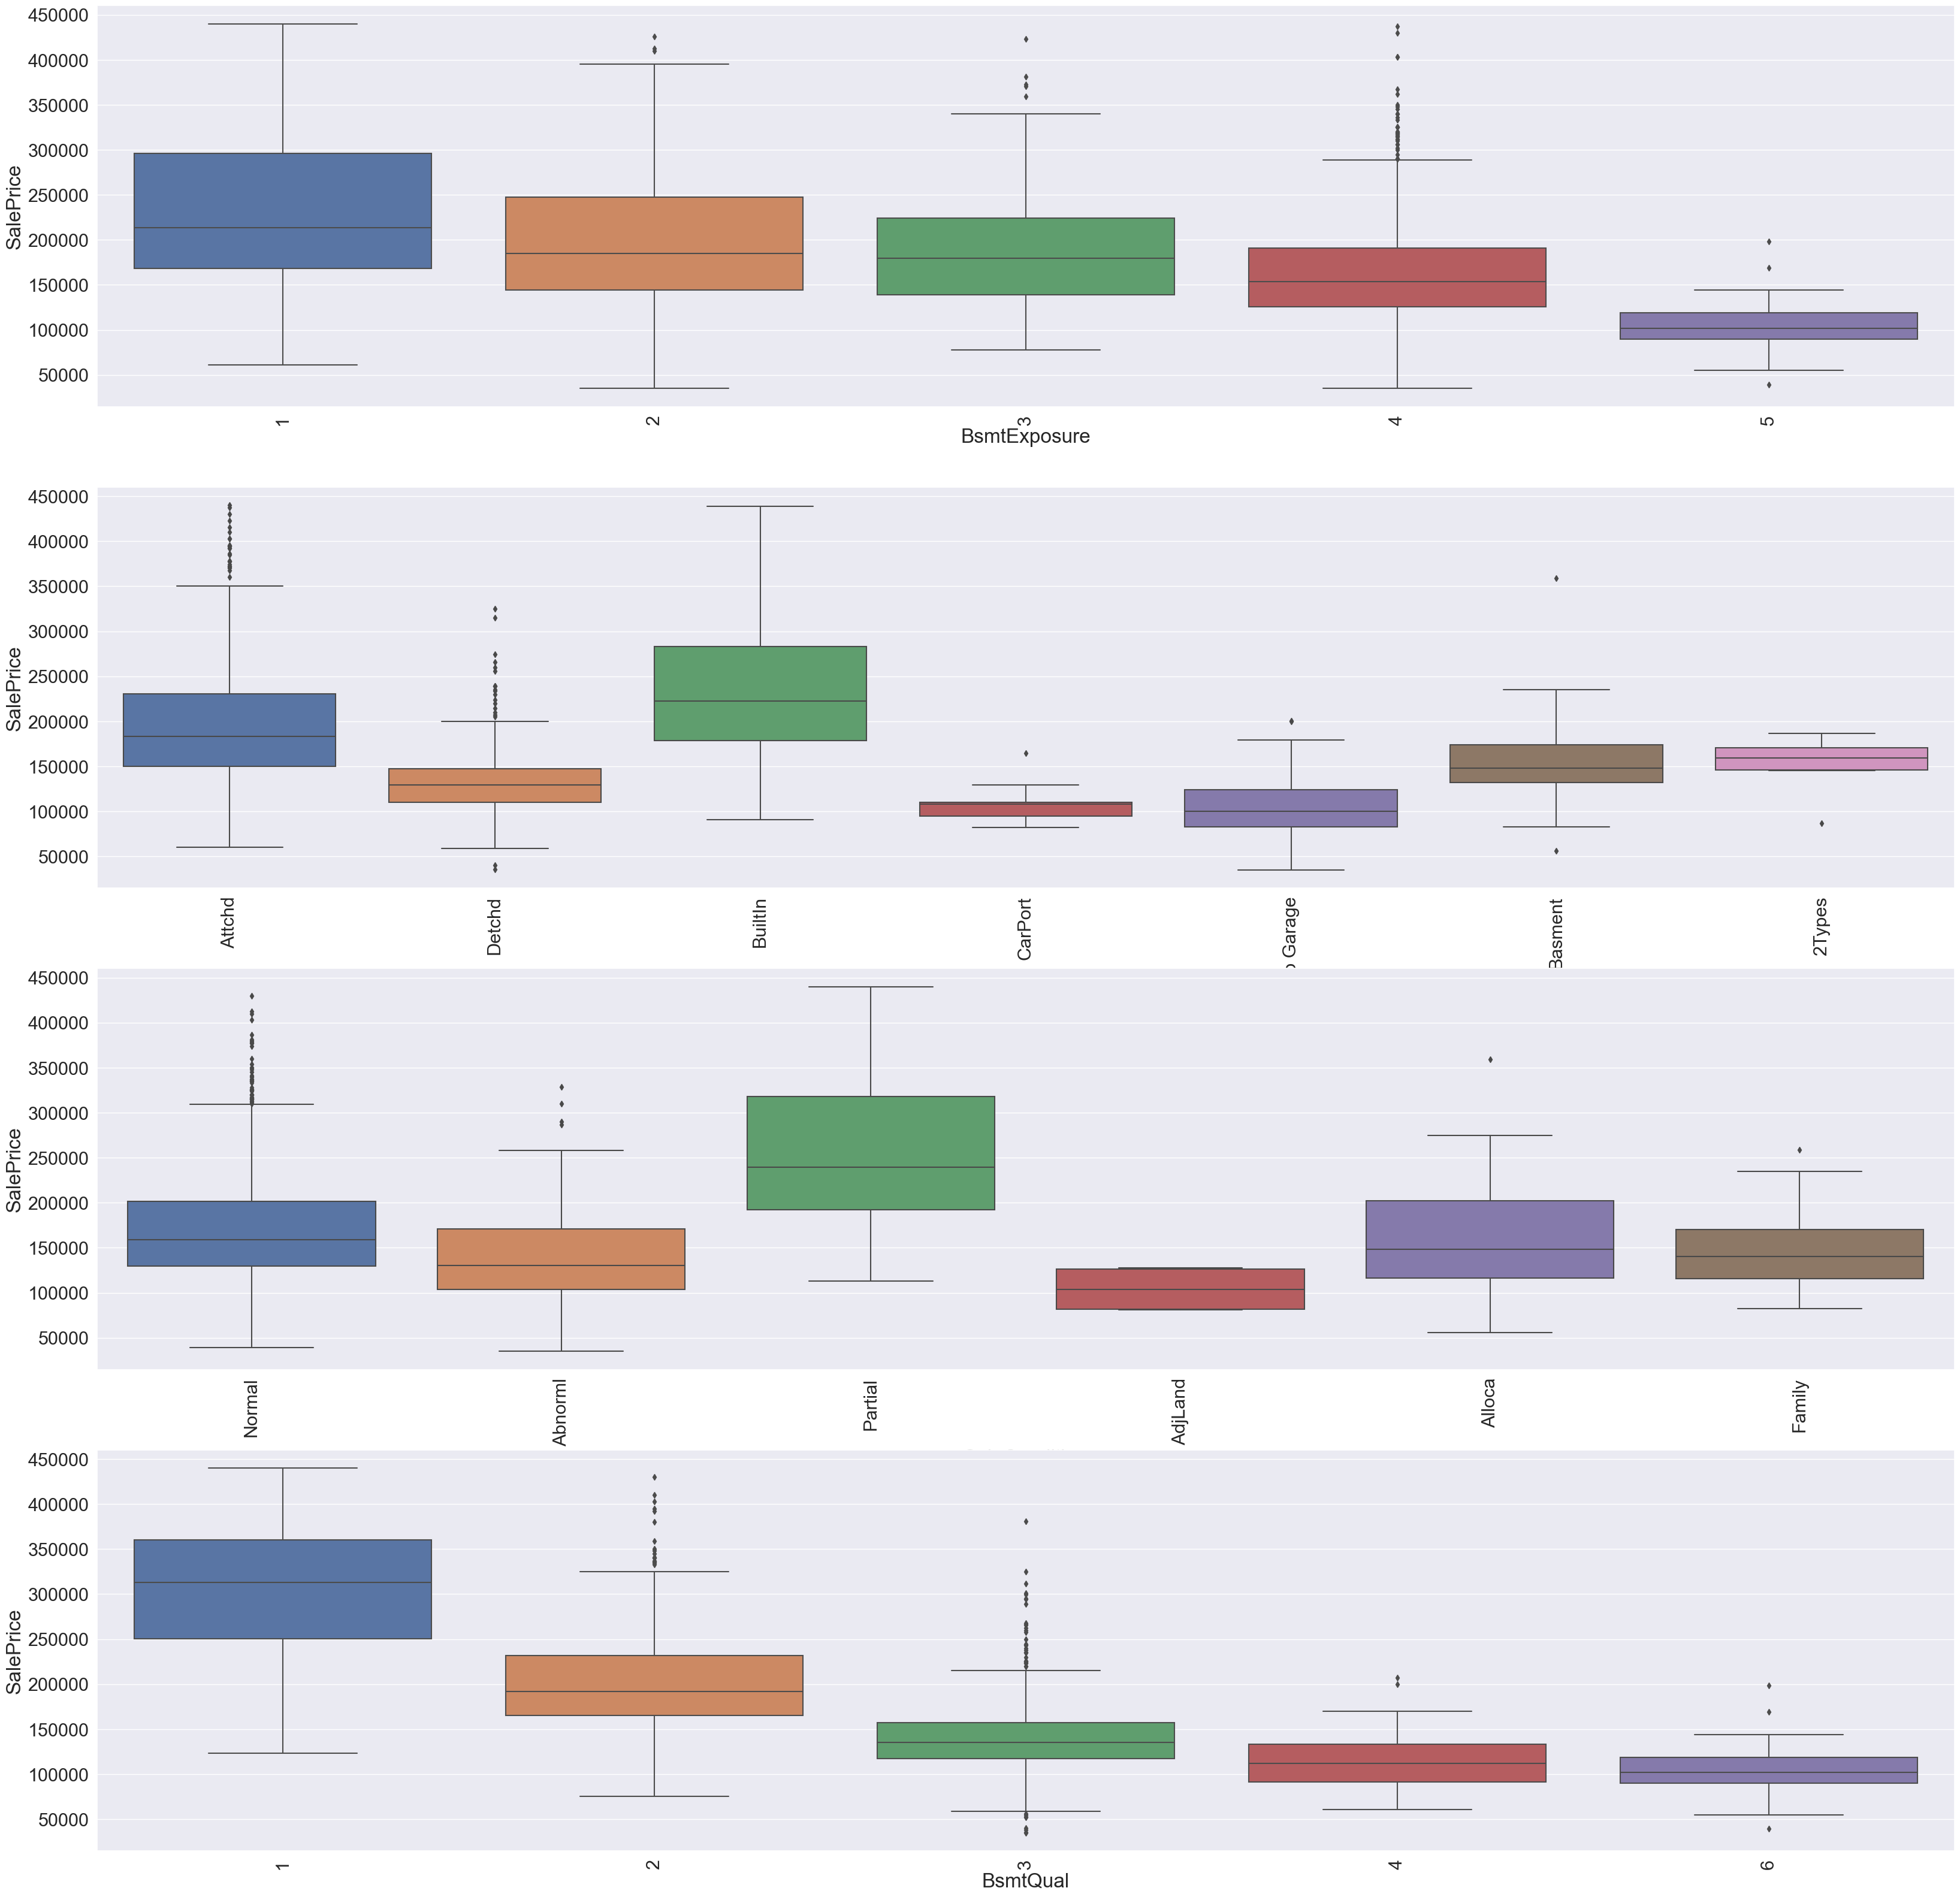

In [266]:
plt.figure(figsize=(40,40))
for i in range(len(columns_sale_price_3)):
    sns.set(font_scale=2)
    plt.subplot(4,1,i+1)
    plt.xticks(rotation=90)
    sns.boxplot(x=house_pricing[columns_sale_price_3[i]],y='SalePrice',data=house_pricing)

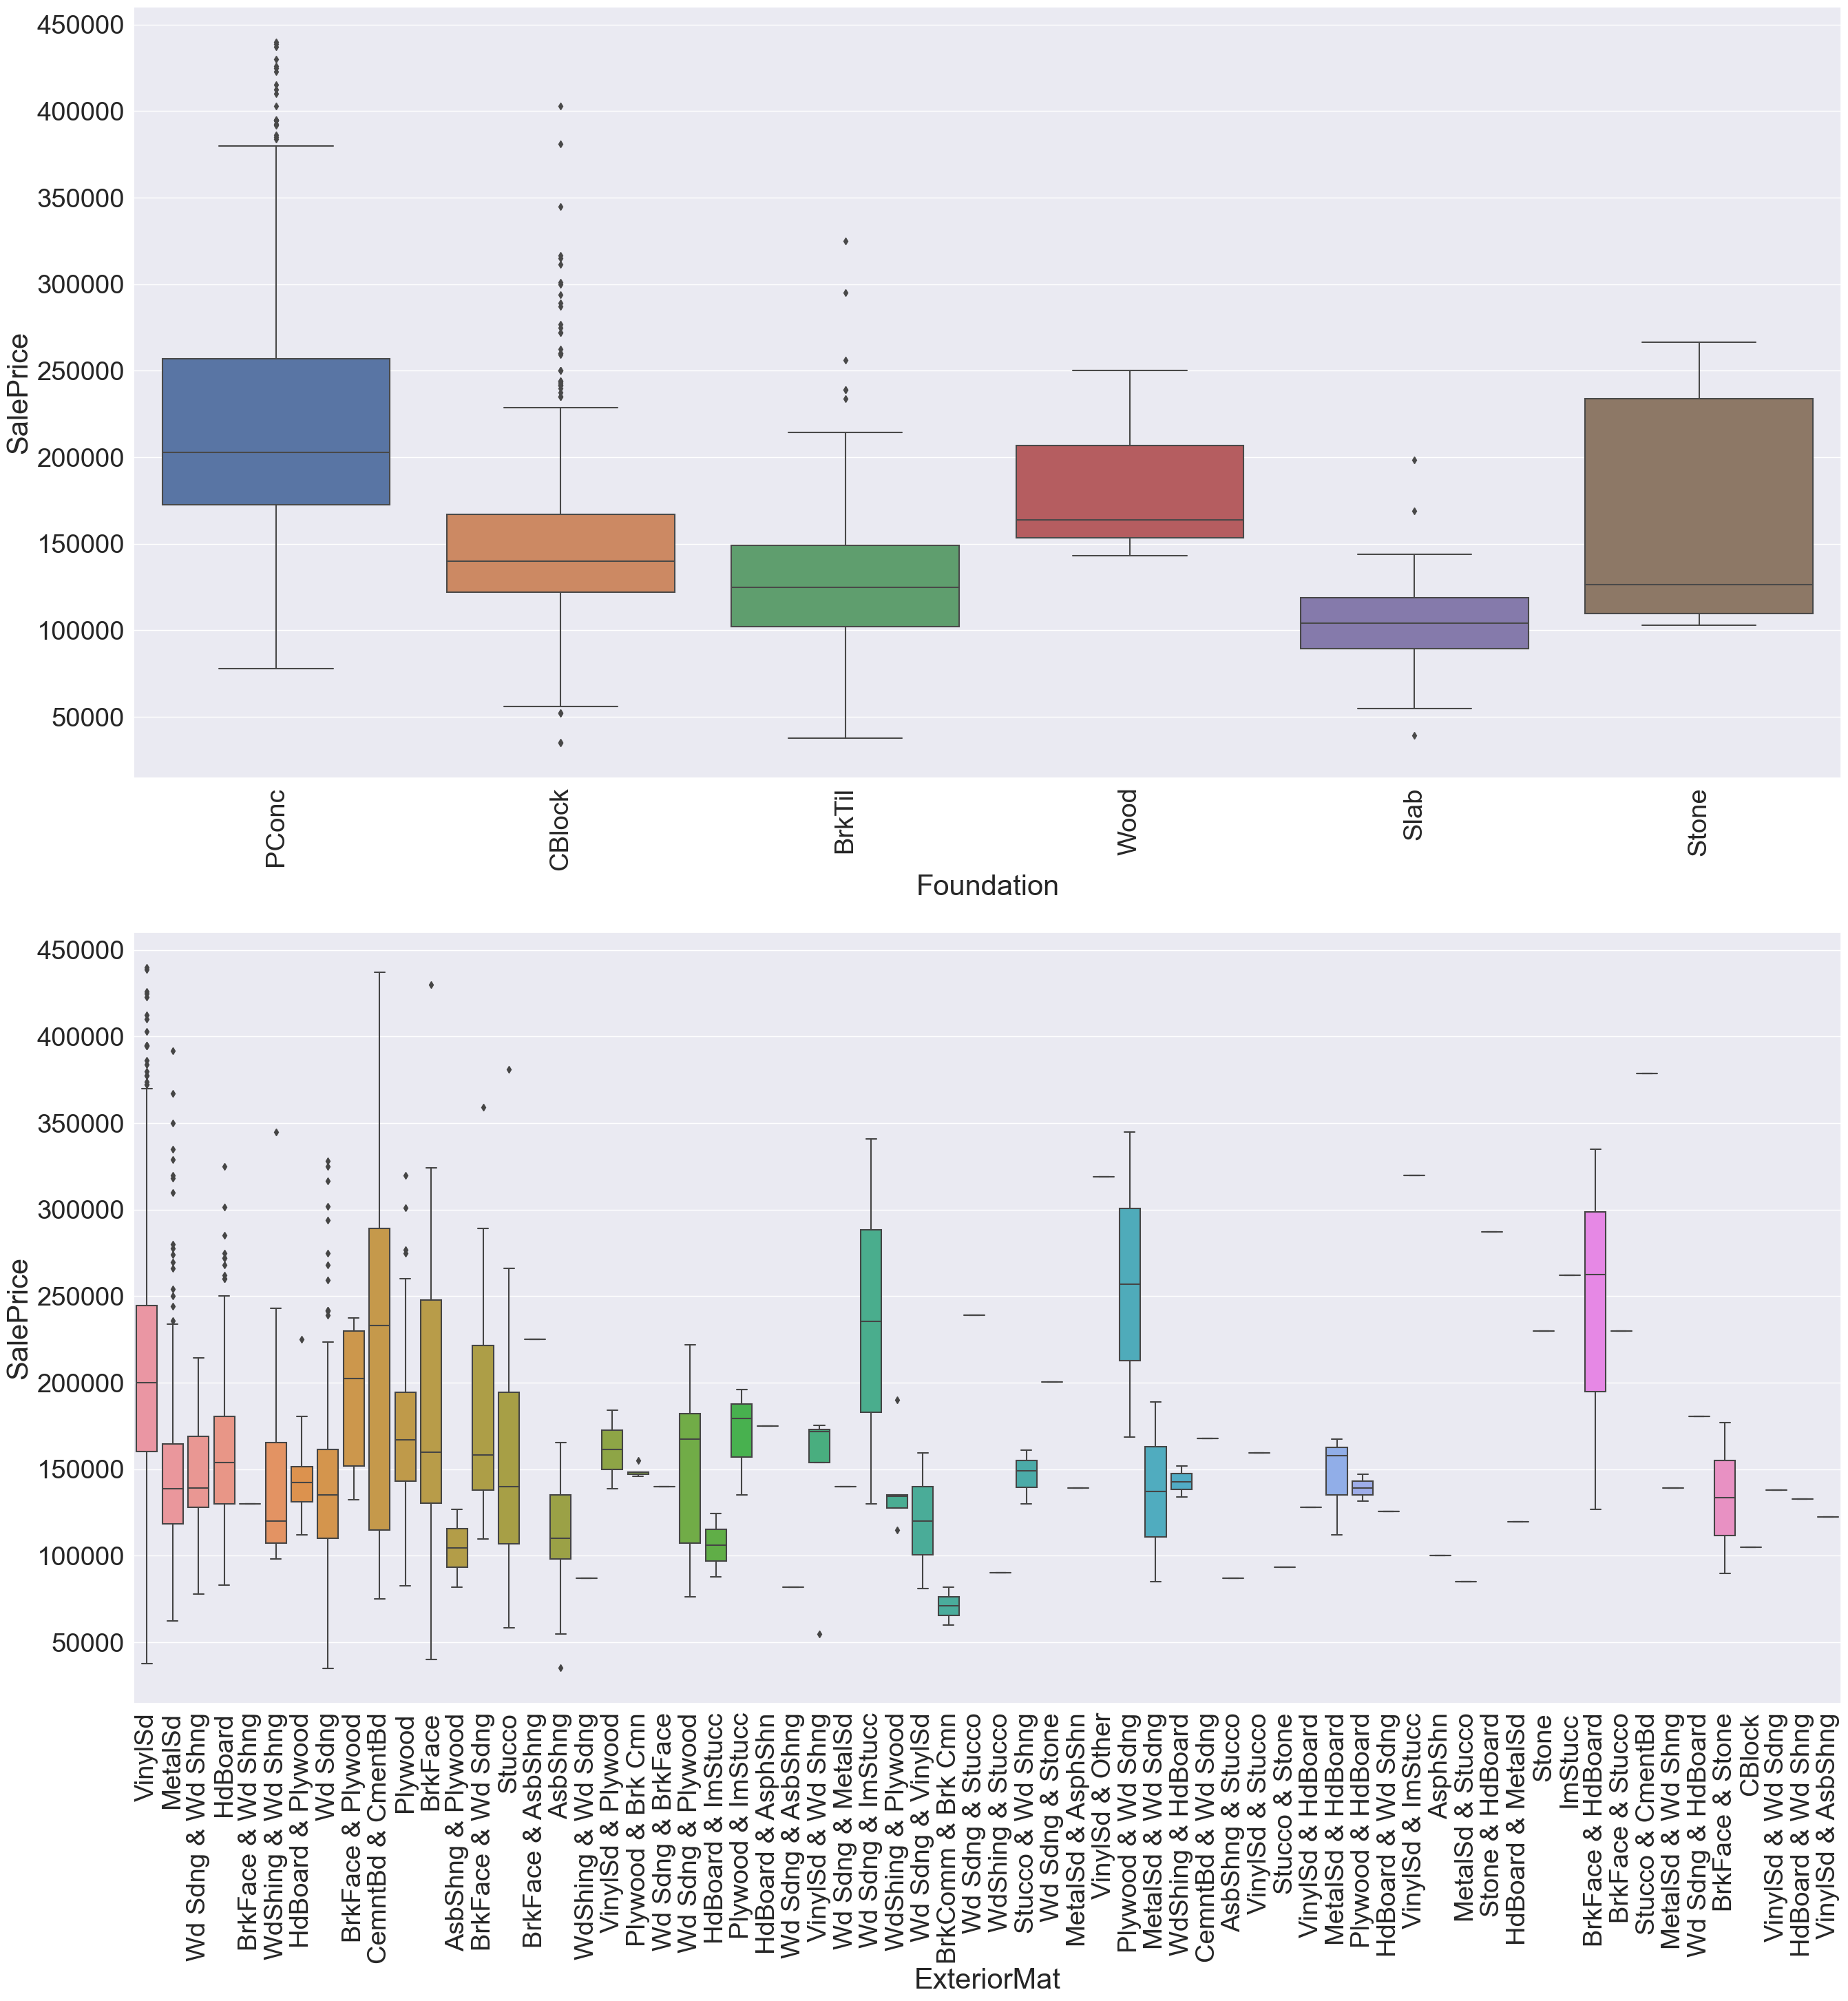

In [267]:
plt.figure(figsize=(32,32))
for i in range(len(columns_sale_price_4)):
    sns.set(font_scale=2.5)
    plt.subplot(2,1,i+1)
    plt.xticks(rotation=90)
    sns.boxplot(x=house_pricing[columns_sale_price_4[i]],y='SalePrice',data=house_pricing)

In [268]:
house_pricing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430 entries, 0 to 1459
Data columns (total 68 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MSSubClass      1430 non-null   object 
 1   MSZoning        1430 non-null   object 
 2   LotFrontage     1430 non-null   float64
 3   LotArea         1430 non-null   int64  
 4   Street          1430 non-null   object 
 5   Alley           1430 non-null   object 
 6   LotShape        1430 non-null   object 
 7   LandContour     1430 non-null   object 
 8   Utilities       1430 non-null   object 
 9   LotConfig       1430 non-null   object 
 10  LandSlope       1430 non-null   int64  
 11  Neighborhood    1430 non-null   object 
 12  BldgType        1430 non-null   object 
 13  OverallQual     1430 non-null   int64  
 14  OverallCond     1430 non-null   int64  
 15  RoofStyle       1430 non-null   object 
 16  RoofMatl        1430 non-null   object 
 17  MasVnrType      1430 non-null   o

### Dummy Variable Creation

In [269]:
drop_1val=['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour','Utilities', 'LotConfig', 'Neighborhood', 'BldgType', 'RoofStyle','RoofMatl', 'Foundation','Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType','PavedDrive', 'MoSold', 'SaleType', 'SaleCondition','ExteriorMat', 'Conditions']

In [270]:
drop_2val=['MasVnrType','GarageType','MiscFeature']

In [271]:
dummies1=pd.get_dummies(house_pricing[drop_1val],drop_first=True)

In [272]:
dummies2=pd.get_dummies(house_pricing['MasVnrType'])

In [273]:
dummies2.drop(columns=['None','Stone'],inplace=True)

In [274]:
dummies3=pd.get_dummies(house_pricing['GarageType'])

In [275]:
dummies3.drop(columns=['Detchd','No Garage'],inplace=True)

In [276]:
dummies4=pd.get_dummies(house_pricing['MiscFeature'])

In [277]:
dummies4.drop(columns=['Othr','No Miscellaneous Features'],inplace=True)

In [278]:
dummies=pd.concat([dummies1,dummies2,dummies3,dummies4],axis=1)

In [279]:
data=pd.concat([house_pricing,dummies],axis=1)

In [280]:
data.drop(columns=['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour','Utilities', 'LotConfig', 'Neighborhood', 'BldgType', 'RoofStyle','RoofMatl', 'Foundation','Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType','PavedDrive', 'MoSold', 'SaleType', 'SaleCondition','ExteriorMat', 'Conditions','MasVnrType','GarageType','MiscFeature','BsmtFinType1','BsmtFinType2'],inplace=True)

# Part 3 - Modelling Activity

### Splitting data into train and test sets.

In [281]:
#splitting the dataset into train and test
df_train,df_test=train_test_split(data,train_size=0.7,test_size=0.3,random_state=100)

#creating a scaler object
scaler = MinMaxScaler()

#scaling of the train dataset
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

#scaling of the test dataset
df_test[num_vars]=scaler.transform(df_test[num_vars])


In [282]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 126 to 80
Columns: 255 entries, LotFrontage to TenC
dtypes: float64(26), int64(14), uint8(215)
memory usage: 530.3 KB


In [283]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 429 entries, 58 to 1397
Columns: 255 entries, LotFrontage to TenC
dtypes: float64(26), int64(14), uint8(215)
memory usage: 227.5 KB


<Axes: >

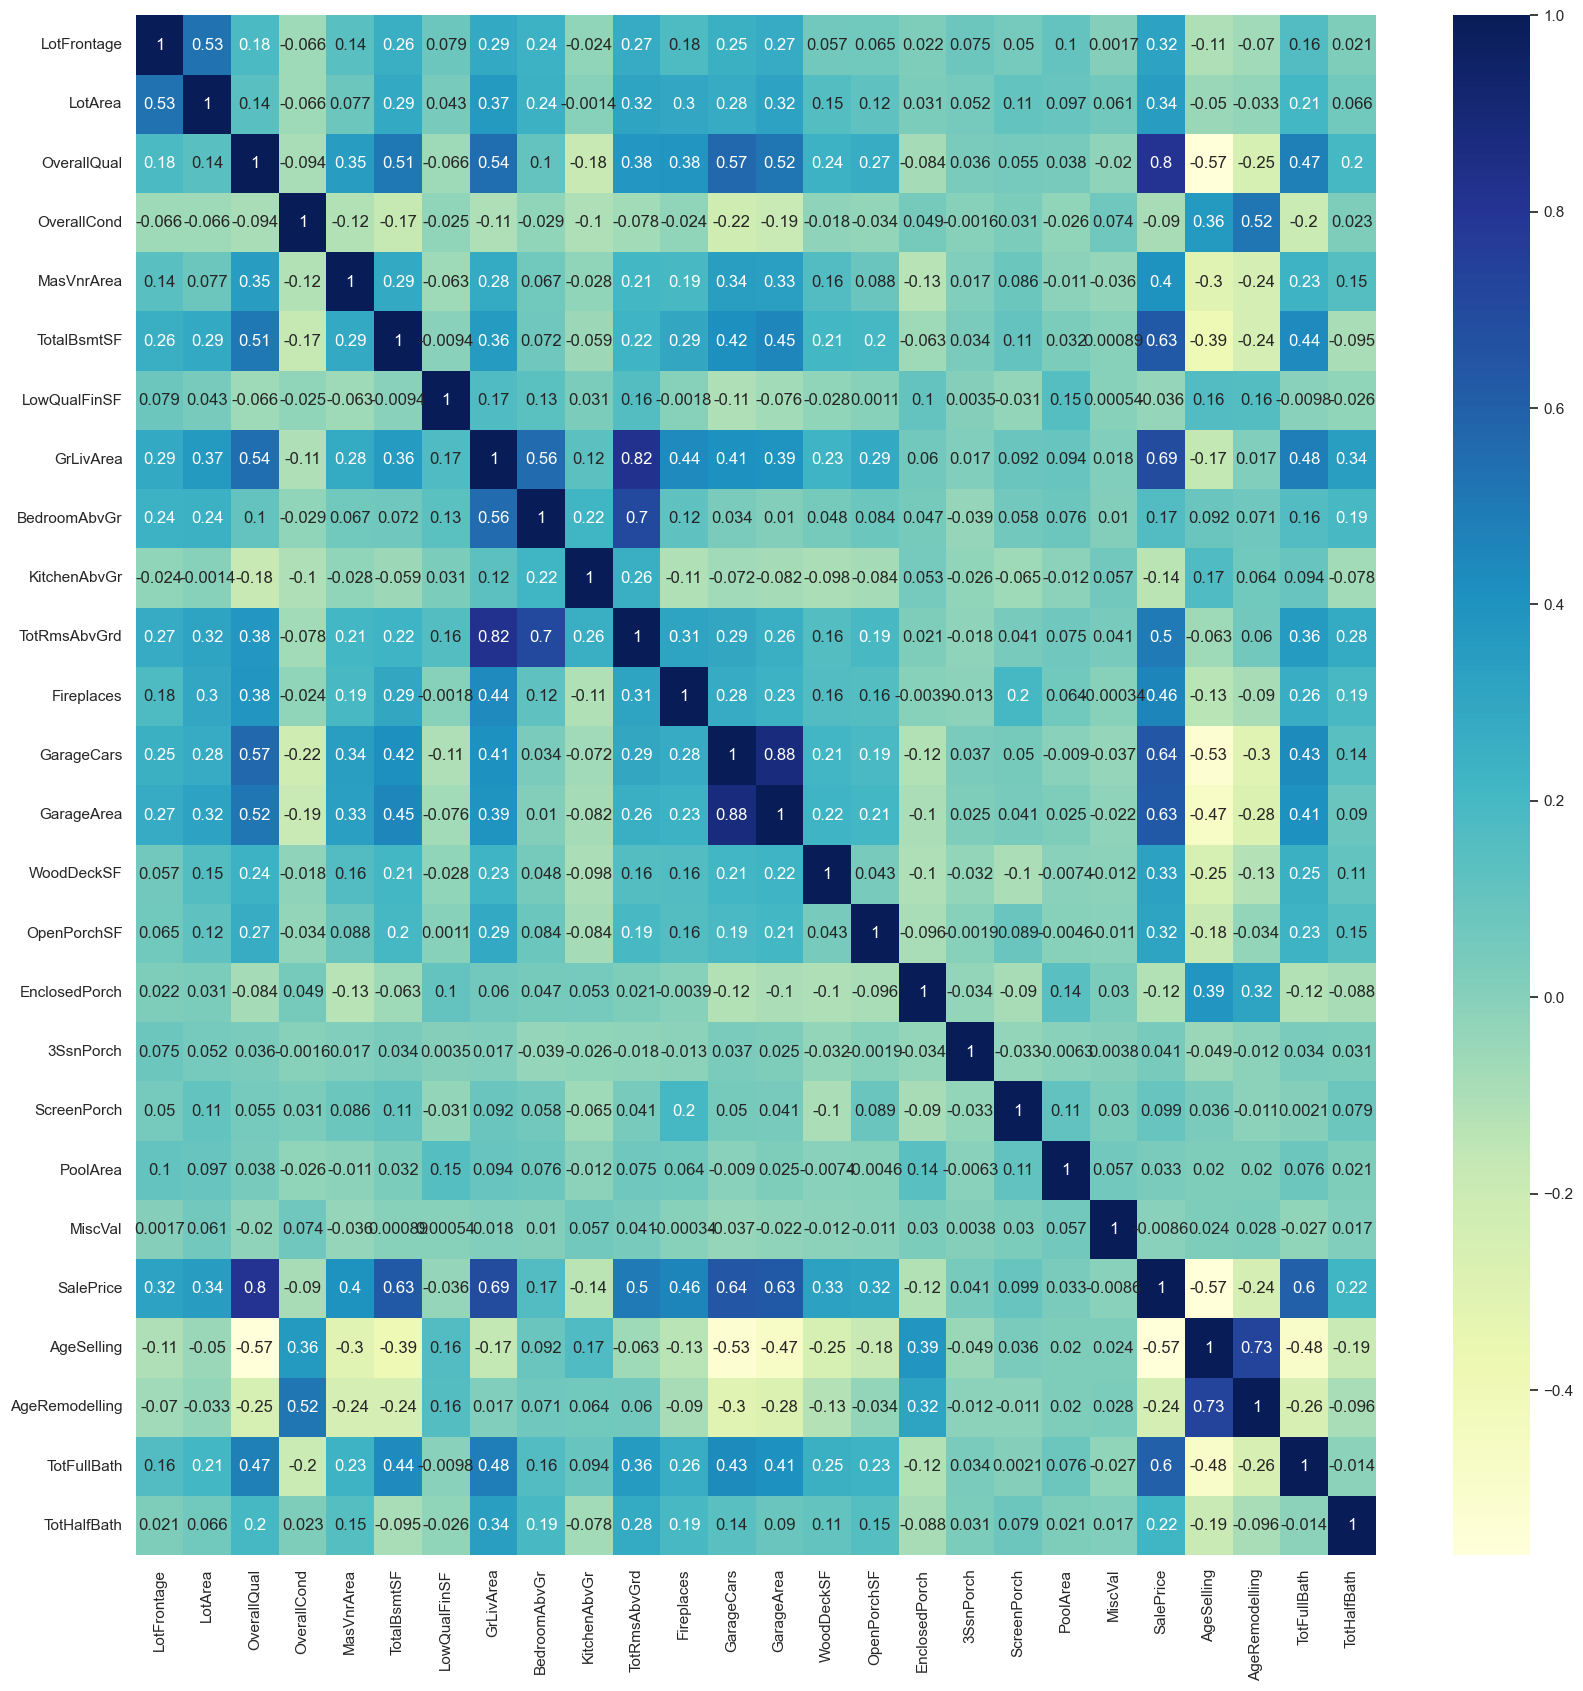

In [284]:
plt.figure(figsize=(20,20))
sns.set(font_scale=1)
sns.heatmap(data=df_train[num_vars].corr(),annot=True,cmap='YlGnBu')

From the above heatmap following observations can be made:

 1. GarageCars and GarageArea are highly correlated and hence GarrageCars can be dropped for further analysis.
 2. TotRmsAbvGrd and GrLivArea are highly correlated and hence TotRmsAbvGrd can be dropped for further analysis.
 3. Correlation between SalePrice and OverallCond is very less and it can be said that the OverallCond is not influencing the SalePrice thus dropping the same for further analysis.

In [285]:
df_train.drop(columns=['GarageCars','TotRmsAbvGrd','OverallCond'],inplace=True)
df_test.drop(columns=['GarageCars','TotRmsAbvGrd','OverallCond'],inplace=True)

In [286]:
df_train.shape

(1000, 252)

### Training the model using statsmodels.

In [287]:
y_train=df_train.pop('SalePrice')
X_train=df_train

In [288]:
X_train.shape

(1000, 251)

In [289]:
X_train_sm=sm.add_constant(X_train)
lm_ols=sm.OLS(y_train,X_train_sm).fit()

In [290]:
print(lm_ols.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     45.33
Date:                Mon, 20 May 2024   Prob (F-statistic):               0.00
Time:                        13:05:04   Log-Likelihood:                 1705.6
No. Observations:                1000   AIC:                            -2945.
Df Residuals:                     767   BIC:                            -1802.
Df Model:                         232                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

From the summary report it is clear that there is an issue of multicollinearity in the model and also many of the predictor variables are having very high p values. Thus defining a function below to mitigate the same upto an extent where the p values are under the significance level (0.05).

Now checking the test score for the above model.

In [291]:
y_test=df_test.pop('SalePrice')
X_test=df_test
X_test.shape

(429, 251)

In [292]:
X_test_sm=sm.add_constant(X_test,has_constant='add')
X_train_sm=sm.add_constant(X_train)

In [293]:
y_train_pred=lm_ols.predict(X_train_sm)
y_test_pred=lm_ols.predict(X_test_sm)

In [294]:
res=y_test-y_test_pred

Text(0.5, 0, 'Residual Values')

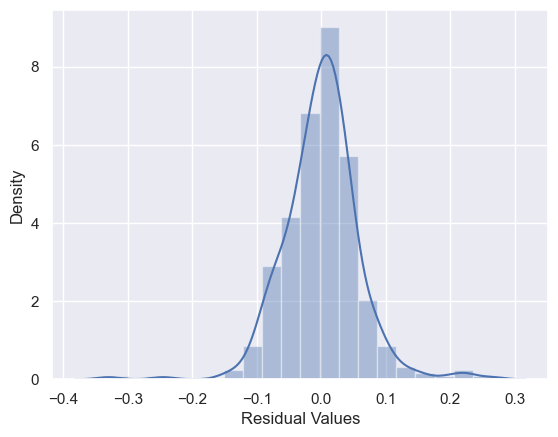

In [295]:
sns.set(font_scale=1.0)
sns.distplot(res,bins=20)
plt.xlabel('Residual Values')

Text(0, 0.5, 'y_pred')

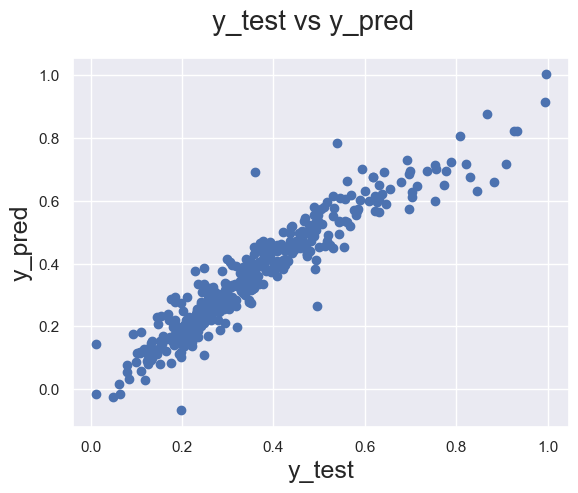

In [296]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 18)      

Text(0, 0.5, 'Standardized Residuals')

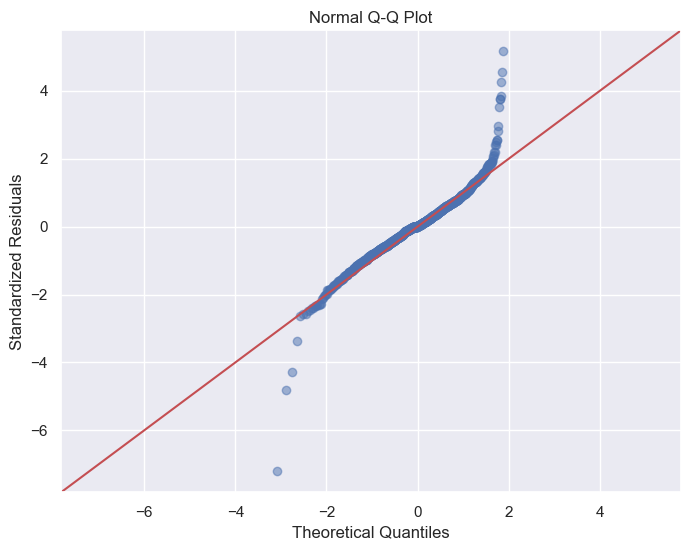

In [297]:
QQ = ProbPlot(lm_ols.get_influence().resid_studentized_internal)
fig = QQ.qqplot(line='45', alpha=0.5, color='blue', lw=1)
fig.set_size_inches(8, 6)
fig.gca().set_title('Normal Q-Q Plot')
fig.gca().set_xlabel('Theoretical Quantiles')
fig.gca().set_ylabel('Standardized Residuals')

From the above graphs it is clear that residuals are normal in nature and they have homoscedastic nature thus a linear regression model can be used.

In [298]:
#Calculating Metrics for test data for linear regression OLS model
lr_metric = []
r2_train_lr = r2_score(y_train, y_train_pred)
print(r2_train_lr)
lr_metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_test_pred)
print(r2_test_lr)
lr_metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_train_pred))
print(rss1_lr)
lr_metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_test_pred))
print(rss2_lr)
lr_metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_train_pred)
print(mse_train_lr)
lr_metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_test_pred)
print(mse_test_lr)
lr_metric.append(mse_test_lr**0.5)

0.9320286879418879
0.8876684098606754
1.932058138943602
1.4554542808275959
0.001932058138943602
0.003392667321276447


### Training the model using Ridge Regression.

In [299]:
from sklearn.model_selection import GridSearchCV
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [300]:
print(model_cv.best_params_)

{'alpha': 2.0}


In [301]:
alpha = model_cv.best_params_['alpha']
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=2.0)

In [302]:
alpha_ridge = alpha

In [303]:
# calculating metrics such as R2 score, RSS and RMSE for ridge model with alpha 

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

ridge_metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
ridge_metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
ridge_metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
ridge_metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
ridge_metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
ridge_metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
ridge_metric.append(mse_test_lr**0.5)

0.9234990189961411
0.9045108523860018
2.1745106650186483
1.2372306712207606
0.0021745106650186484
0.0028839875786031716


In [304]:
double_alpha = 2*alpha
ridge_double = Ridge(alpha=double_alpha)

ridge_double.fit(X_train, y_train)

Ridge(alpha=4.0)

In [305]:
# calculating metrics such as R2 score, RSS and RMSE for ridge model with alpha value doubled  

y_pred_train = ridge_double.predict(X_train)
y_pred_test = ridge_double.predict(X_test)

ridge_double_metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
ridge_double_metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
ridge_double_metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
ridge_double_metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
ridge_double_metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
ridge_double_metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
ridge_double_metric.append(mse_test_lr**0.5)

0.9172624996874212
0.8998998208392064
2.3517813035314004
1.2969747342709739
0.0023517813035314004
0.0030232511288367687


Text(0.5, 0, 'Residual Values')

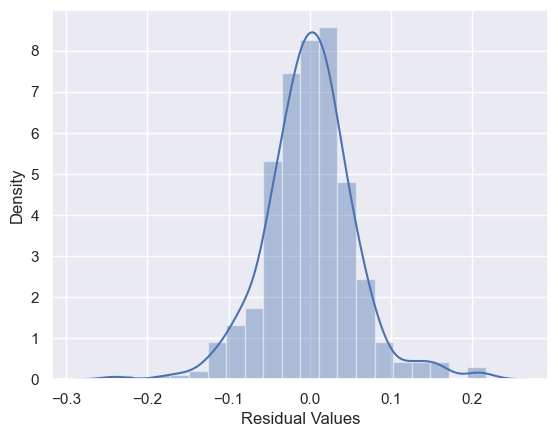

In [306]:
res = y_test - y_pred_test
sns.set(font_scale=1.0)
sns.distplot(res,bins=20)
plt.xlabel('Residual Values')

Text(0, 0.5, 'y_pred')

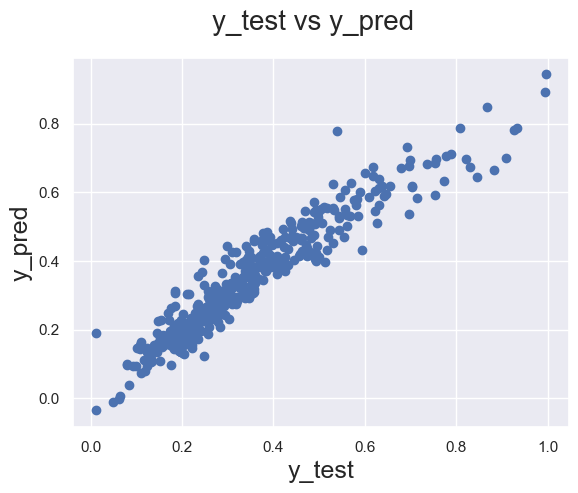

In [307]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_test)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 18)      

Text(0, 0.5, 'Residuals')

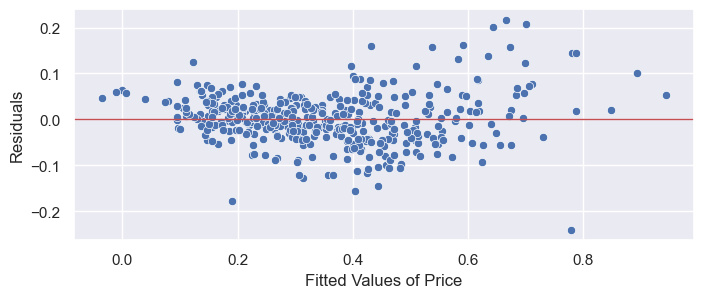

In [308]:
# Creating a scatter plot between the fitted values of 'cnt' and the residuals
plt.figure(figsize = (8, 3))
sns.scatterplot(x = y_pred_test, y = res)
plt.axhline(y = 0, xmin = 0, xmax = 1, linewidth = 1, color = 'r')
plt.xlabel('Fitted Values of Price')
plt.ylabel('Residuals')

From the distribution of the residuals and y_pred_test vs y_test it is clear that the assumptions of linear regression hold true.

In [309]:
# beta table for both the ridge regression models with alpha and double_alpha
betas_ridge = pd.DataFrame(index=[X_train.columns], 
                     columns = [str(alpha), str(double_alpha)])
betas_ridge[str(alpha)] = ridge.coef_ # Ridge Regression
betas_ridge[str(double_alpha)] = ridge_double.coef_ # Lasso Regression
betas_ridge

,2.0,4.0
LotFrontage,0.027685,0.025809
LotArea,0.047446,0.042391
LandSlope,0.012447,0.012448
OverallQual,0.151555,0.137813
MasVnrArea,0.054019,0.047156
ExterQual,-0.017332,-0.020813
ExterCond,-0.001335,-0.002369
BsmtQual,-0.011971,-0.015235
BsmtCond,0.010743,0.012408
BsmtExposure,-0.011861,-0.012355


In [310]:
ridge_table=pd.DataFrame(columns = ['Metrics'])
ridge_table['Metrics'] = ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)','MSE (Train)','MSE (Test)','Number of features']
ridge_table['Ridge Regression (alpha = '+str(alpha)+')'] = ridge_metric+[len(ridge.coef_[ridge.coef_!=0])]
ridge_table['Ridge Regression (alpha = '+str(double_alpha)+')'] = ridge_double_metric+[len(ridge_double.coef_[ridge_double.coef_!=0])]
ridge_table

,Metrics,Ridge Regression (alpha = 2.0),Ridge Regression (alpha = 4.0)
0,R2 Score (Train),0.923499,0.917262
1,R2 Score (Test),0.904511,0.899900
2,RSS (Train),2.174511,2.351781
3,RSS (Test),1.237231,1.296975
4,MSE (Train),0.046632,0.048495
5,MSE (Test),0.053703,0.054984
6,Number of features,240.000000,240.000000


From the above table it is clear that when the alpha value is doubled from the best alpha values, the model performance drops for ridge regression as can be seen from the increase in the difference between the train r2 score and test r2 score.

### Training the model using Lasso Regression.

In [311]:
lasso = Lasso()

params = {'alpha': [0.0000001,0.000001,0.00001, 0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 31 candidates, totalling 155 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01,
                                   0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,
                                   9.0, 10.0, 20, 50, 100, 500, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [312]:
print(model_cv.best_params_)

{'alpha': 0.0001}


In [313]:
alpha = model_cv.best_params_['alpha']
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [314]:
alpha_lasso = alpha

In [315]:
# calculating metrics such as R2 score, RSS and RMSE for Lasso 

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

lasso_metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
lasso_metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
lasso_metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
lasso_metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
lasso_metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
lasso_metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
lasso_metric.append(mse_test_lr**0.5)

0.9205824310385955
0.9018706499132592
2.25741354464091
1.271439160448402
0.00225741354464091
0.002963727646732872


In [316]:
double_alpha = 2*alpha
lasso_double = Lasso(alpha=double_alpha)

lasso_double.fit(X_train, y_train)

Lasso(alpha=0.0002)

In [317]:
y_pred_train = lasso_double.predict(X_train)
y_pred_test = lasso_double.predict(X_test)


lasso_double_metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
lasso_double_metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
lasso_double_metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
lasso_double_metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
lasso_double_metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
lasso_double_metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
lasso_double_metric.append(mse_test_lr**0.5)

0.9122268348173224
0.897187222271231
2.4949181211486477
1.3321212428624545
0.0024949181211486476
0.003105177722290104


Text(0.5, 0, 'Residual Values')

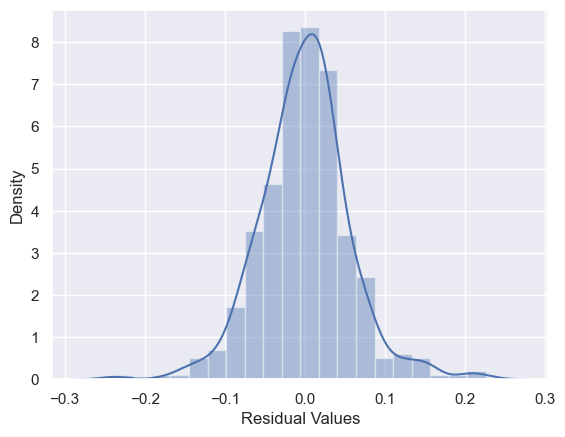

In [318]:
res = y_test - y_pred_test
sns.set(font_scale=1.0)
sns.distplot(res,bins=20)
plt.xlabel('Residual Values')

Text(0, 0.5, 'y_pred')

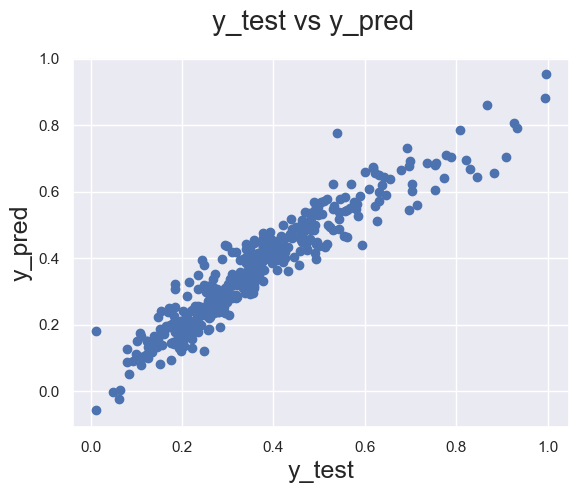

In [319]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_test)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 18)      

Text(0, 0.5, 'Residuals')

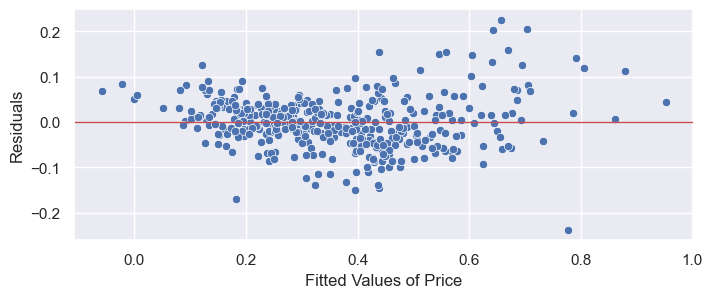

In [320]:
# Creating a scatter plot between the fitted values of 'cnt' and the residuals
plt.figure(figsize = (8, 3))
sns.scatterplot(x = y_pred_test, y = res)
plt.axhline(y = 0, xmin = 0, xmax = 1, linewidth = 1, color = 'r')
plt.xlabel('Fitted Values of Price')
plt.ylabel('Residuals')

From the distribution of the residuals and y_pred_test vs y_test it is clear that the assumptions of linear regression hold true.

In [321]:
lasso_table=pd.DataFrame(columns = ['Metrics'])
lasso_table['Metrics'] = ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)','MSE (Train)','MSE (Test)','Number of features']
lasso_table['Lasso Regression (alpha = '+str(alpha)+')'] = lasso_metric+[len(lasso.coef_[lasso.coef_!=0])]
lasso_table['Lasso Regression (alpha = '+str(double_alpha)+')'] = lasso_double_metric+[len(lasso_double.coef_[lasso_double.coef_!=0])]
lasso_table

,Metrics,Lasso Regression (alpha = 0.0001),Lasso Regression (alpha = 0.0002)
0,R2 Score (Train),0.920582,0.912227
1,R2 Score (Test),0.901871,0.897187
2,RSS (Train),2.257414,2.494918
3,RSS (Test),1.271439,1.332121
4,MSE (Train),0.047512,0.049949
5,MSE (Test),0.054440,0.055724
6,Number of features,131.000000,95.000000


From the above table it is clear that when the alpha value is doubled from the best alpha values, the model performance drops as can be seen from the increase in the difference between the train r2 score and test r2 score.

In [322]:
# Beta Table for comparing the coefficients
betas = pd.DataFrame(index=[X_train.columns], 
                     columns = ['Linear Regregression', 'Ridge Regression', 'Lasso Regression'])
betas['Linear Regregression'] = lm_ols.params[lm_ols.params.index!='const'].values # Linear Regression
betas['Ridge Regression'] = ridge.coef_ # Ridge Regression
betas['Lasso Regression'] = lasso.coef_ # Lasso Regression
betas

,Linear Regregression,Ridge Regression,Lasso Regression
LotFrontage,1.162395e-02,0.027685,0.004114
LotArea,7.783277e-02,0.047446,0.033149
LandSlope,8.481472e-03,0.012447,0.009087
OverallQual,1.631554e-01,0.151555,0.169235
MasVnrArea,7.528858e-02,0.054019,0.043991
ExterQual,-1.295769e-02,-0.017332,-0.015533
ExterCond,2.410551e-03,-0.001335,-0.001475
BsmtQual,-6.937433e-03,-0.011971,-0.005988
BsmtCond,4.050735e-03,0.010743,0.008849
BsmtExposure,-1.086015e-02,-0.011861,-0.011462


Comparison of model performances for all the models

In [323]:
summary_table=pd.DataFrame(columns = ['Metrics'])
summary_table['Metrics'] = ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)','MSE (Train)','MSE (Test)','Numbe of features']
summary_table['Multiple Linear Regression'] = lr_metric + [len(lm_ols.params.iloc[1:][lm_ols.params!=0])]
summary_table['Ridge Regression (Alpha = '+str(alpha_ridge)+')'] = ridge_metric + [len(ridge.coef_[ridge.coef_!=0])]
summary_table['Lasso Regression (Alpha = '+str(alpha_lasso)+')'] = lasso_metric + [len(lasso.coef_[lasso.coef_!=0])]
summary_table

,Metrics,Multiple Linear Regression,Ridge Regression (Alpha = 2.0),Lasso Regression (Alpha = 0.0001)
0,R2 Score (Train),0.932029,0.923499,0.920582
1,R2 Score (Test),0.887668,0.904511,0.901871
2,RSS (Train),1.932058,2.174511,2.257414
3,RSS (Test),1.455454,1.237231,1.271439
4,MSE (Train),0.043955,0.046632,0.047512
5,MSE (Test),0.058247,0.053703,0.054440
6,Numbe of features,251.000000,240.000000,131.000000


#### From the above summary table it can be seen that model performance wise ridge regression performs marginally better than the lasso regression model, but I'll choose the loasso regression model as lasso regression as indirectly performed feature selection and has given a model which has a test score only marginally less in comparison to the ridge regression.

We will use RFE in combination with Lasso Regression to get the top 10 features for predicting house prices.

In [324]:
rfe=RFE(estimator=lasso,n_features_to_select=10)
rfe.fit(X_train,y_train)

RFE(estimator=Lasso(alpha=0.0001), n_features_to_select=10)

In [325]:
y_pred_train = rfe.predict(X_train)
y_pred_test = rfe.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)

0.8507921483716456
0.8394991745040115
4.241175216485268
2.079571857344528
0.004241175216485268
0.004847486846956941


In [326]:
rfe.estimator_.coef_

array([ 0.27942012,  0.23852732,  0.40907541, -0.10534101,  0.14803258,
       -0.19548388,  0.08351677,  0.0775452 ,  0.07362091,  0.08655276])

In [327]:
X_train.columns[rfe.support_]

Index(['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr', 'GarageArea',
       'AgeSelling', 'AgeRemodelling', 'Neighborhood_Crawfor',
       'Neighborhood_NridgHt', 'ExteriorMat_Stucco & CmentBd'],
      dtype='object')

In [328]:
rfe.estimator.intercept_

0.04438736124736109

#### The equation of final model is:

$ SalePrice = 0.2794  \times  OverallQual + 0.2385  \times  TotalBsmtSF + 0.4091 \times GrLivArea - 0.1053 \times BedroomAbvGr + 0.1480  \times GarageArea - 0.1955 \times AgeSelling  + 0.0835 \times AgeRemodelling + 0.0775 \times NeighborhoodCrawfor + 0.0736 \times NeighborhoodNridgHt  + 0.0865 \times \text{ExteriorMat_Stucco & CmentBd} + 0.4439 $

#### Code for subjective questions.

To find the top 5 parameters of the ridge model with alpha and ridge model with double alpha, we will find the top 5 parametrs with the highest absolute values.

In [329]:
ridge_params_table=pd.DataFrame(columns=['Parameters','Coefficient Value'])
ridge_params_table['Parameters']=X_train.columns
ridge_params_table['Coefficient Value']=np.abs(ridge.coef_)
ridge_params_table.sort_values(by='Coefficient Value',ascending=False).head(5)

,Parameters,Coefficient Value
13,GrLivArea,0.270251
3,OverallQual,0.151555
10,TotalBsmtSF,0.121730
20,GarageArea,0.099345
34,TotFullBath,0.086529


In [330]:
ridge_double_params_table=pd.DataFrame(columns=['Parameters','Coefficient Value'])
ridge_double_params_table['Parameters']=X_train.columns
ridge_double_params_table['Coefficient Value']=np.abs(ridge_double.coef_)
ridge_double_params_table.sort_values(by='Coefficient Value',ascending=False).head(5)

,Parameters,Coefficient Value
13,GrLivArea,0.224385
3,OverallQual,0.137813
10,TotalBsmtSF,0.111725
20,GarageArea,0.095014
34,TotFullBath,0.084400


To find the top 5 parameters of the lasso model, we will find the top 5 parametrs with the highest absolute values.

In [331]:
lasso_params_table=pd.DataFrame(columns=['Parameters','Coefficient Value'])
lasso_params_table['Parameters']=X_train.columns
lasso_params_table['Coefficient Value']=np.abs(lasso.coef_)
lasso_params_table.sort_values(by='Coefficient Value',ascending=False).head(5)

,Parameters,Coefficient Value
13,GrLivArea,0.360968
3,OverallQual,0.169235
10,TotalBsmtSF,0.129588
89,Neighborhood_StoneBr,0.090184
20,GarageArea,0.089648


In [332]:
lasso_double_params_table=pd.DataFrame(columns=['Parameters','Coefficient Value'])
lasso_double_params_table['Parameters']=X_train.columns
lasso_double_params_table['Coefficient Value']=np.abs(lasso_double.coef_)
lasso_double_params_table.sort_values(by='Coefficient Value',ascending=False).head(5)

,Parameters,Coefficient Value
13,GrLivArea,0.345644
3,OverallQual,0.169870
10,TotalBsmtSF,0.127469
20,GarageArea,0.085895
89,Neighborhood_StoneBr,0.078157


#### Therefore the top 5 parameters for the Lasso Regression model are: 
#### GrLivArea, OverallQual, TotalBsmtSF, Neighborhood_StoneBr and GarageArea.

The new model to be trained is without the top 5 parameters.

In [333]:
top5_params=lasso_params_table.sort_values(by='Coefficient Value',ascending=False).head(5)

Training the model after removing the top 5 parametrs.

In [334]:
X_train_new=X_train.drop(columns=top5_params['Parameters'],axis=1)
X_test_new=X_test.drop(columns=top5_params['Parameters'],axis=1)

In [335]:
lasso_new = Lasso()

params = {'alpha': [0.0000001,0.000001,0.00001, 0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# cross validation
model_cv = GridSearchCV(estimator = lasso_new, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train)

Fitting 5 folds for each of 31 candidates, totalling 155 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01,
                                   0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,
                                   9.0, 10.0, 20, 50, 100, 500, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [336]:
print(model_cv.best_params_)

{'alpha': 0.0001}


In [337]:
alpha = model_cv.best_params_['alpha']
lasso_new = Lasso(alpha=alpha)

lasso_new.fit(X_train_new, y_train)

Lasso(alpha=0.0001)

In [338]:
betas_new = pd.DataFrame(index=[X_train_new.columns], 
                     columns = [ 'Lasso Regression New'])
betas_new['Lasso Regression New'] = lasso_new.coef_# Lasso Regression
betas_new

,Lasso Regression New
LotFrontage,0.049095
LotArea,0.120015
LandSlope,0.008375
MasVnrArea,0.108446
ExterQual,-0.034952
ExterCond,0.002313
BsmtQual,-0.028025
BsmtCond,0.009272
BsmtExposure,-0.013552
HeatingQC,-0.006177


In [339]:
betas_new['Lasso Regression New'].apply(np.abs).sort_values(ascending=False).head(5)

TotFullBath                 0.161297
LotArea                     0.120015
Conditions_Artery & PosA    0.119428
Neighborhood_Gilbert        0.109134
MasVnrArea                  0.108446
Name: Lasso Regression New, dtype: float64

#### The new top 5 features are: 
#### TotFullBath, LotArea, Conditons_Artery & PasA, Neighborhood_Gilbert and MasVnrArea.

In [340]:
y_pred_train = lasso_new.predict(X_train_new)
y_pred_test = lasso_new.predict(X_test_new)


lasso_new_metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
lasso_new_metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
lasso_new_metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
lasso_new_metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
lasso_new_metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
lasso_new_metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
lasso_new_metric.append(mse_test_lr**0.5)

0.8699505205134522
0.8516344899234787
3.696605931227956
1.922337398591206
0.003696605931227956
0.004480972957089058
